In [2]:
#Import results file and SLEAP predictions file
#Function to know the time at which at a frame was taken relative to the first TTL pulse.


import numpy as np

def load_ttl_and_video_times_absolute(fname_results,
                                      fname_video):
    d = np.load(fname_results, allow_pickle=True)
    
    ttl_times = d['ttl_times']
    vid = np.load(fname_video, allow_pickle=True)
    vid_times = vid['vide_frame_times']
    #print (vid_times)
    vid_times = vid_times[:,1]
    vid_times = vid_times - vid_times[0]+ttl_times[0]
    print ("#ttl times: ", ttl_times.shape)
    print ("#Video times: ", vid_times.shape)
    return ttl_times, vid_times
#
fname_results = r"D:\train_SLEAP_simple\testalign\DON-011733\20230305\data\results.npz"
fname_video = r"D:\train_SLEAP_simple/testalign/DON-011733/20230305/data/video_data.npz"
ttl_times, vid_times = load_ttl_and_video_times_absolute(fname_results,
                                                            fname_video)

#ttl times:  (90000,)
#Video times:  (89188,)


In [3]:
print((ttl_times[89999]-ttl_times[0])/90000)

0.03334981131333333


In [4]:
89999+1

90000

In [5]:
print(ttl_times)

[  32.8792659   32.9132542   32.9468929 ... 3034.2957623 3034.3284802
 3034.3622841]


In [6]:
print(vid_times)

[  32.8792659    32.90716278   32.93708145 ... 3034.28464376 3034.31456363
 3034.34947025]


In [7]:
difference=abs(ttl_times[2]-vid_times)
idx = np.argmin(difference)
print(idx)

2


In [8]:
#Loop to create a list of indeces that correspond to the nearest frame time for each TTL pulse time.

indexes = []


for n in range(len(ttl_times)):
    abs_difference=abs(ttl_times[n]-vid_times)
    idx = np.argmin(abs_difference)
    indexes.append(idx)


print(indexes[0:10])






[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
print(len(indexes))


90000


In [10]:
#Since there are less frames than TTL pulses, some frames will be assigned to more than one TTL pulse.

def find_duplicates(lst):
    duplicates = []
    seen = set()
    
    for item in lst:
        if item in seen:
            duplicates.append(item)
        else:
            seen.add(item)
    
    return duplicates

# Example usage

result = find_duplicates(indexes)
print(result)

[312, 813, 1359, 2027, 2040, 2040, 2041, 2348, 2901, 2901, 2990, 2992, 2993, 2994, 3007, 3192, 3285, 3288, 3290, 3583, 3586, 3586, 3586, 3880, 3883, 3883, 3933, 3933, 3934, 4176, 4179, 4180, 4474, 4476, 4477, 4701, 4771, 4774, 4775, 5069, 5072, 5072, 5073, 5239, 5240, 5364, 5366, 5366, 5662, 5665, 5666, 5960, 5963, 5964, 6128, 6257, 6260, 6261, 6549, 6554, 6556, 6556, 6557, 6851, 6853, 6854, 6856, 6857, 6857, 6858, 7145, 7147, 7148, 7442, 7444, 7444, 7445, 7448, 7481, 7737, 7739, 7740, 7740, 8033, 8035, 8036, 8036, 8330, 8332, 8332, 8332, 8627, 8629, 8630, 8630, 8873, 8875, 8875, 8921, 8924, 8925, 9062, 9064, 9217, 9220, 9220, 9515, 9517, 9518, 9519, 9519, 9811, 9813, 9814, 10109, 10111, 10111, 10111, 10112, 10405, 10407, 10408, 10408, 10702, 10705, 10705, 10965, 10999, 11001, 11001, 11002, 11296, 11298, 11299, 11300, 11428, 11428, 11429, 11430, 11430, 11545, 11588, 11591, 11591, 11831, 11885, 11887, 11888, 11889, 12182, 12184, 12185, 12480, 12482, 12482, 12483, 12777, 12780, 12780, 13

In [11]:
import h5py
import numpy as np

with h5py.File(r"D:\train_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5", "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print("D:\train_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5")
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
D:	rain_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(89188, 10, 2, 1)

===nodes===
0: mouth
1: neck
2: eye
3: lefthand
4: righthand
5: leftfoot
6: ear
7: thorax
8: nose
9: tongue



In [12]:
#For each one of the 89188 frames there is the position of 10 nodes in the two XY coordinates for just 1 animal.


print(locations.shape)

(89188, 10, 2, 1)


In [13]:
#This generates an array in which there is 90000 frames with their relative nodes positions for the 900000 ttl pulses.


behavior_frames = []
for k in range(len(indexes)):
    temp = locations[indexes[k]]
    behavior_frames.append(temp)
behavior_frames = np.array(behavior_frames)
print(behavior_frames.shape)

print(behavior_frames[0:10,:,:,0])

(90000, 10, 2, 1)
[[[ 579.76351569  763.41204699]
  [ 873.55644528  740.03472524]
  [ 684.43767474  599.92073007]
  [ 890.97310332  885.63540352]
  [ 698.74314706  845.07626862]
  [1418.74434053  968.01750878]
  [ 900.76575413  608.04992671]
  [1062.299622    706.35994587]
  [ 468.82401349  677.14534129]
  [          nan           nan]]

 [[ 584.38916016  761.16241455]
  [ 831.76513672  705.36877441]
  [ 681.52679443  600.50598145]
  [ 911.82885742  872.82818604]
  [ 688.89129639  847.88018799]
  [1416.68078613  968.17047119]
  [ 905.27752686  608.04504395]
  [1063.95654297  649.30010986]
  [ 471.53289795  688.0692749 ]
  [          nan           nan]]

 [[ 584.80786133  761.12731934]
  [ 825.74291992  712.25762939]
  [ 681.62280273  600.40710449]
  [ 920.96826172  872.50689697]
  [ 703.89654541  847.7911377 ]
  [1424.97802734  969.17510986]
  [ 904.83575439  607.8449707 ]
  [1064.22692871  649.25799561]
  [ 471.7729187   687.73028564]
  [          nan           nan]]

 [[ 584.86401367

In [14]:
#Obtain information about the reward state associated with each TTL pulse.
import pandas as pd
rewards = pd.read_excel(r"D:\train_SLEAP_simple\testalign\DON-011733\20230305\data\results.xlsx")
rewards = np.array(rewards)
rewards=rewards[:,8]
rewards[rewards>0.5]=1
rewards[rewards<0.5]=0
print(len(rewards))
print(rewards[0:10])

90000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
#Number of TTL pulses with Reward ON state.

np.count_nonzero(rewards)

2340

In [16]:
#Extract the indices of the first TTL pulse corresponding for a reward, for each reward.

def extract_reward_indices(n):
    reward_indices = []
    for i in range(len(n)):
        if n[i] == 1 and n[i - 1] == 0:
            reward_indices.append(i)
    return reward_indices

# Example usage:
reward_indices=extract_reward_indices(rewards)
print(reward_indices)

[4119, 4437, 12666, 13015, 16402, 21564, 23134, 23567, 24413, 26535, 26782, 26908, 27067, 27913, 29356, 30215, 30504, 31245, 32619, 32972, 33698, 33971, 38008, 43017, 44876, 45374, 45546, 46195, 52621, 53637, 56471, 75116, 75538]


## TONGUE_INDEX = 9
LEFTHAND_INDEX =3

tongue_loc = locations[:, TONGUE_INDEX, :, :]
lefthand_loc = locations[:, LEFTHAND_INDEX, :, :]

import sleap
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

plt.figure()
plt.plot(lefthand_loc[:,0,0], 'y')

plt.plot(-1*lefthand_loc[:,1,0], 'y')

plt.legend(loc="center right")
plt.title('Tonge locations')


plt.figure(figsize=(7,7))
plt.plot(tongue_loc[:,0,0],tongue_loc[:,1,0], 'y',label='fly-0')
plt.legend()

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(0,2000)
plt.yticks([])
plt.title('Left hand tracks')



In [17]:
TONGUE_INDEX = 9
LEFTHAND_INDEX =3
LEFTFOOT_INDEX=5
NOSE_INDEX=8
EAR_INDEX=6
RIGHTHAND_INDEX=4
MOUTH_INDEX=0

tongue_loc = behavior_frames[:, TONGUE_INDEX, :, :]
lefthand_loc = behavior_frames[:, LEFTHAND_INDEX, :, :]



print(tongue_loc[1:10])
print(lefthand_loc[1:10])

[[[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]]
[[[911.82885742]
  [872.82818604]]

 [[920.96826172]
  [872.50689697]]

 [[937.12841797]
  [872.43817139]]

 [[952.30126953]
  [872.36608887]]

 [[936.9284668 ]
  [872.47167969]]

 [[920.55957031]
  [872.61572266]]

 [[912.15789795]
  [872.90466309]]

 [[904.253479  ]
  [872.95959473]]

 [[903.83123779]
  [872.94018555]]]


In [18]:
nose_loc = behavior_frames[:, NOSE_INDEX, :, :]
mouth_loc = behavior_frames[:, MOUTH_INDEX, :, :]
ear_loc = behavior_frames[:, EAR_INDEX, :, :]
leftfoot_loc = behavior_frames[:, LEFTFOOT_INDEX, :, :]
righthand_loc = behavior_frames[:, RIGHTHAND_INDEX, :, :]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Left hand locations')

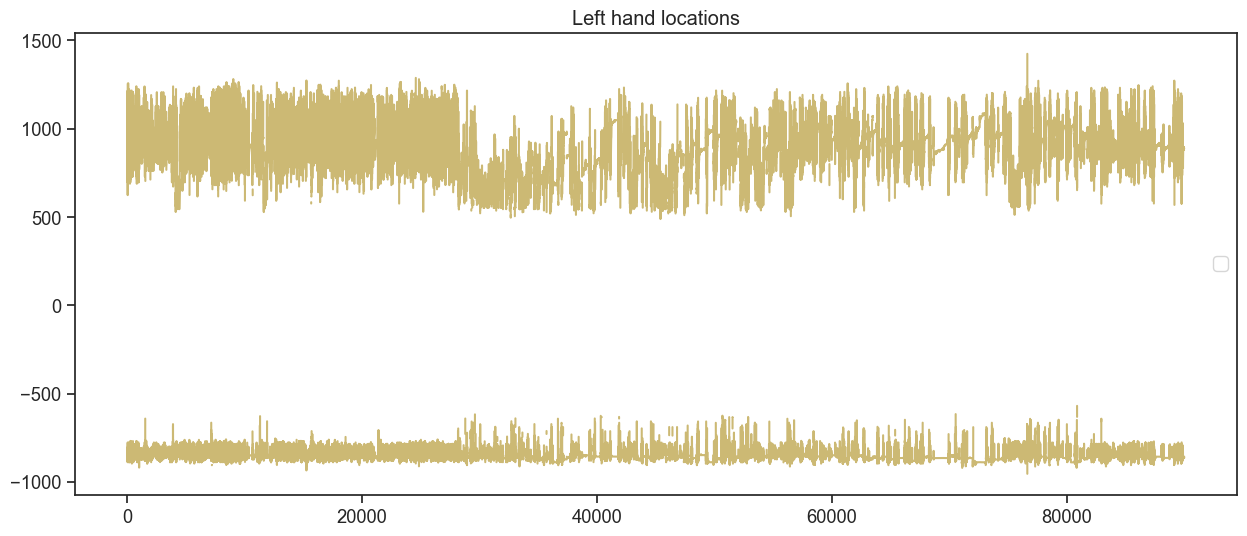

In [19]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

plt.figure()
plt.plot(lefthand_loc[:,0,0], 'y')

plt.plot(-1*lefthand_loc[:,1,0], 'y')

plt.legend(loc="center right")
plt.title('Left hand locations')

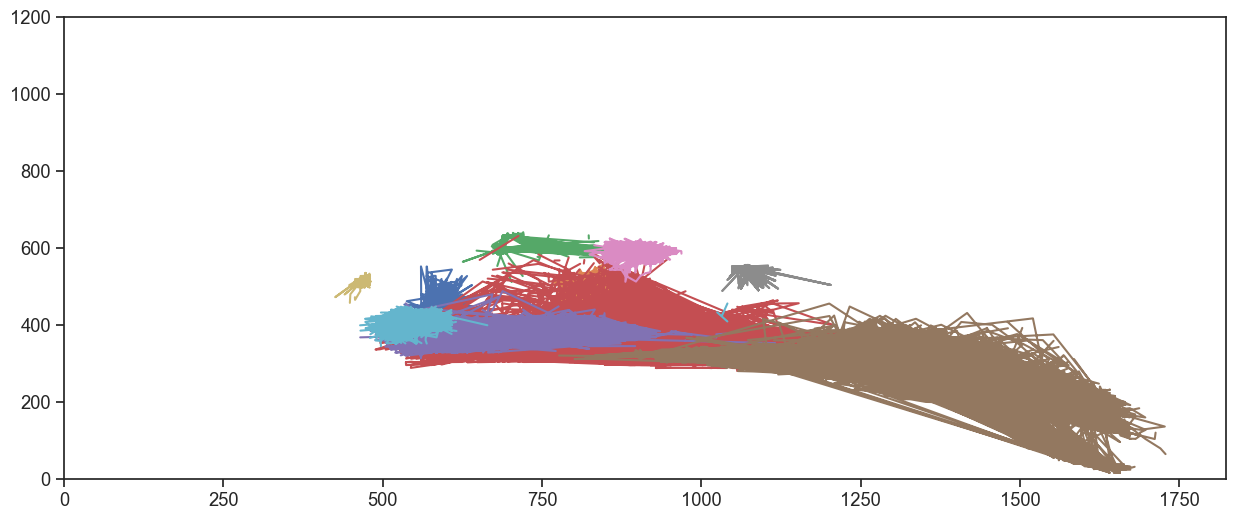

In [84]:
behavior_frames.shape
plt.figure()
# plot each body part
for k in range(10):
	#
	bp = behavior_frames[:,k,:,0]
	
	# bp has dimensions: (90000,2)
	plt.plot(bp[:,0],
			 1200-bp[:,1],
			 )
			 

plt.gray()        
plt.xlim(0, 1824)
plt.ylim(0, 1200)
plt.show()

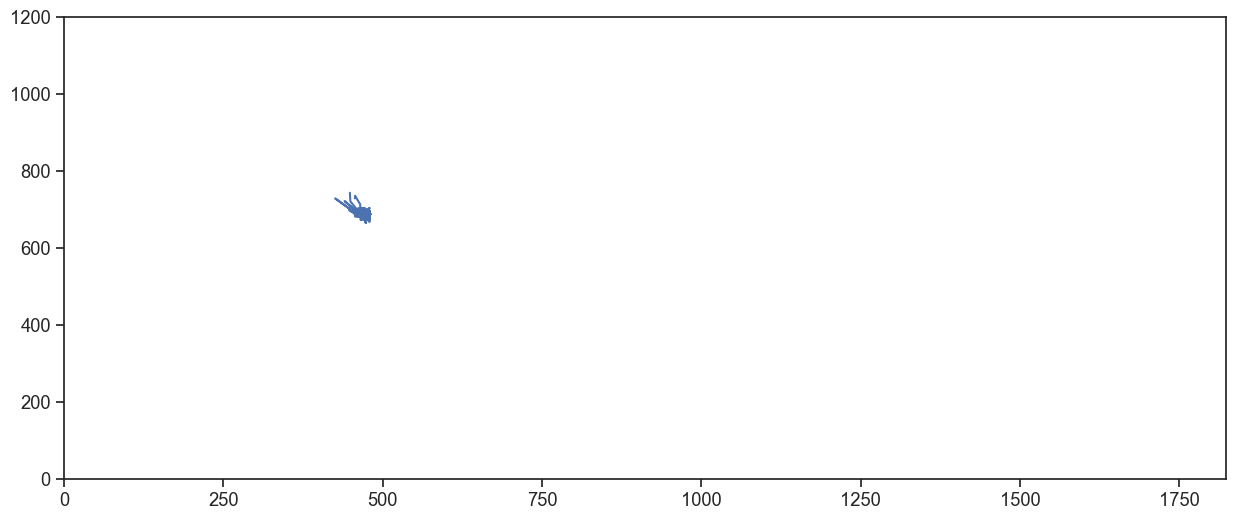

In [82]:
bp = behavior_frames[:,8,:,0]


plt.plot(bp[:,0],
			 bp[:,1],
			 )
			 

plt.gray()        
plt.xlim(0, 1824)
plt.ylim(0, 1200)
plt.show()

Text(0.5, 1.0, 'Left hand tracks')

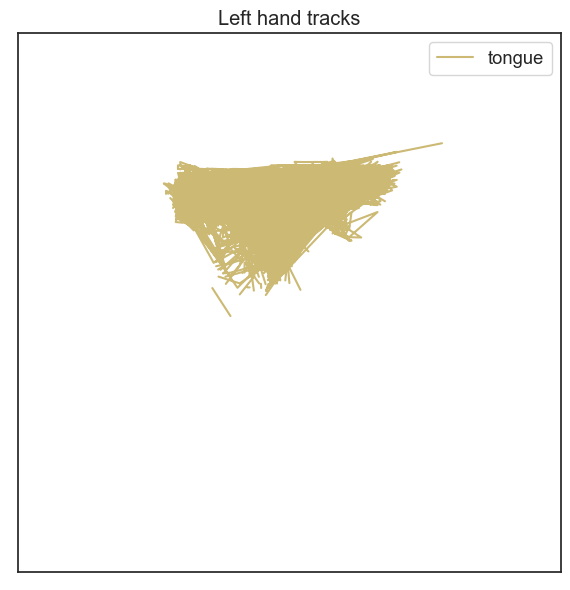

In [21]:
plt.figure(figsize=(7,7))
plt.plot(lefthand_loc[:,0,0],lefthand_loc[:,1,0], 'y',label='tongue')

plt.legend()

plt.xticks([])
plt.xlim(0,1824)
plt.xticks([])

plt.ylim(0,1200)
plt.yticks([])
plt.yticks([])
plt.title('Left hand tracks')

In [22]:
#Compute velocity


from scipy.signal import savgol_filter

def smooth_diff(node_loc, win=25, poly=3):
    """
    node_loc is a [frames, 2] array
    
    win defines the window to smooth over
    
    poly defines the order of the polynomial
    to fit with
    
    """
    node_loc_vel = np.zeros_like(node_loc)
    
    for c in range(node_loc.shape[-1]):
        node_loc_vel[:, c] = savgol_filter(node_loc[:, c], win, poly, deriv=1)
    
    node_vel = np.linalg.norm(node_loc_vel,axis=1)

    return node_vel

velocity=smooth_diff(lefthand_loc[:,:,0])

vel_lefthand = lefthand_loc[1:,:] - lefthand_loc[:-1,:]

print(vel_lefthand[0:3])

[[[ 20.8557541 ]
  [-12.80721749]]

 [[  9.1394043 ]
  [ -0.32128906]]

 [[ 16.16015625]
  [ -0.06872559]]]


In [23]:
vel_nose = nose_loc[1:,:] - nose_loc[:-1,:]

v1_nose=vel_nose[:,0,:]
v1_nose=v1_nose.flatten()


v2_nose=vel_nose[:,1,:]
v2_nose=v2_nose.flatten()


v_all_nose=(v1_nose**2)+(v2_nose**2)


vel_comp_nose=np.sqrt(v_all_nose)




#############################



vel_mouth = mouth_loc[1:,:] - mouth_loc[:-1,:]

v1_mouth=vel_mouth[:,0,:]
v1_mouth=v1_mouth.flatten()


v2_mouth=vel_mouth[:,1,:]
v2_mouth=v2_mouth.flatten()


v_all_mouth=(v1_mouth**2)+(v2_mouth**2)


vel_comp_mouth=np.sqrt(v_all_mouth)




###############################


vel_ear = ear_loc[1:,:] - ear_loc[:-1,:]

v1_ear=vel_ear[:,0,:]
v1_ear=v1_ear.flatten()


v2_ear=vel_ear[:,1,:]
v2_ear=v2_ear.flatten()


v_all_ear=(v1_ear**2)+(v2_ear**2)


vel_comp_ear=np.sqrt(v_all_ear)



###############################


vel_leftfoot = leftfoot_loc[1:,:] - leftfoot_loc[:-1,:]

v1_leftfoot=vel_leftfoot[:,0,:]
v1_leftfoot=v1_leftfoot.flatten()


v2_leftfoot=vel_leftfoot[:,1,:]
v2_leftfoot=v2_leftfoot.flatten()


v_all_leftfoot=(v1_leftfoot**2)+(v2_leftfoot**2)


vel_comp_leftfoot=np.sqrt(v_all_leftfoot)




################################



vel_righthand = righthand_loc[1:,:] - righthand_loc[:-1,:]

v1_righthand=vel_righthand[:,0,:]
v1_righthand=v1_righthand.flatten()


v2_righthand=vel_righthand[:,1,:]
v2_righthand=v2_righthand.flatten()


v_all_righthand=(v1_righthand**2)+(v2_righthand**2)


vel_comp_righthand=np.sqrt(v_all_righthand)




###################################



vel_tongue = tongue_loc[1:,:] - tongue_loc[:-1,:]

v1_tongue=vel_tongue[:,0,:]
v1_tongue=v1_tongue.flatten()


v2_tongue=vel_tongue[:,1,:]
v2_tongue=v2_tongue.flatten()


v_all_tongue=(v1_tongue**2)+(v2_tongue**2)


vel_comp_tongue=np.sqrt(v_all_tongue)








In [24]:
print(vel_comp_righthand.size)

89999


In [25]:
v1=vel_lefthand[:,0,:]
v1=v1.flatten()
print(v1.shape)

v2=vel_lefthand[:,1,:]
v2=v2.flatten()
print(v2.shape)

v_all=(v1**2)+(v2**2)
print(v_all.shape)

vel_comp_lefthand=np.sqrt(v_all)


(89999,)
(89999,)
(89999,)


In [26]:
len(vel_lefthand)

89999

In [27]:
print(velocity[0:10])

[22.0210603  17.16295231 12.74836333  8.77988083  5.26587232  2.25479389
  0.97597774  2.8818486   4.61303988  5.93164656]


In [28]:
print(vel_lefthand.shape)

(89999, 2, 1)


In [29]:
print(velocity.shape)

velocity=np.nan_to_num(velocity, nan=0)

(90000,)


In [30]:
event_arrays = []

for i in reward_indices:
    lower_bound = i - 750
    upper_bound = i + 750
    event_array = velocity[lower_bound:upper_bound]
    event_arrays.append(event_array)

print(len(event_arrays))
print(event_arrays[32])

33
[ 0.          0.          0.         ... 19.9867756  12.70142354
  8.66369888]


In [31]:
event_arrays_5s = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_lefthand[lower_bound:upper_bound]
    event_arrays_5s.append(event_array)
    

event_arrays_5s=np.nan_to_num(event_arrays_5s, nan=0)  
    
print(event_arrays_5s[32])





[6.49282326e+00 7.28608379e+00 6.07545809e-01 5.33445509e+01
 1.66641629e+01 2.66491230e+01 1.45739180e+02 6.42369223e+01
 2.36652208e+01 4.30202589e+01 2.35848105e+01 1.67830999e+01
 9.00640423e+00 8.45182686e+00 1.33087957e+00 5.17836052e+01
 8.23124077e+01 1.01374455e+01 7.62545140e+00 8.13306963e-01
 1.12071376e+01 4.03569510e+01 7.27998693e-01 1.10486221e+01
 7.42971543e+00 7.81118577e+00 1.69344594e+01 4.74659689e-01
 3.29469249e-01 6.73734177e+00 9.36779517e+00 6.78205343e+00
 1.73477516e+01 3.21028732e+01 2.26710064e+01 1.72673340e+01
 1.53135527e+01 7.65228246e+00 8.14160378e+00 7.80721988e+00
 2.54445959e+01 2.39534781e+01 1.07067155e+01 2.61225582e+01
 1.08140876e+01 1.81844694e+01 4.07592452e+01 5.66313669e+01
 1.62375860e+01 1.78910743e+01 1.60296181e+01 3.25635972e+01
 8.42050840e+00 0.00000000e+00 0.00000000e+00 1.59621552e+01
 3.36358482e+01 3.90434988e+01 3.40604059e+01 2.42262218e+01
 8.10102671e+00 8.40603596e-01 6.47630188e+01 9.15699160e+01
 1.10913210e+00 9.353015

In [32]:
event_arrays_5s_ear = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_ear[lower_bound:upper_bound]
    event_arrays_5s_ear.append(event_array)
    

event_arrays_5s_ear=np.nan_to_num(event_arrays_5s_ear, nan=0) 


#######


event_arrays_5s_mouth = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_mouth[lower_bound:upper_bound]
    event_arrays_5s_mouth.append(event_array)
    

event_arrays_5s_mouth=np.nan_to_num(event_arrays_5s_mouth, nan=0) 


###########


event_arrays_5s_nose = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_nose[lower_bound:upper_bound]
    event_arrays_5s_nose.append(event_array)
    

event_arrays_5s_nose=np.nan_to_num(event_arrays_5s_nose, nan=0) 


###############


event_arrays_5s_righthand = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_righthand[lower_bound:upper_bound]
    event_arrays_5s_righthand.append(event_array)
    

event_arrays_5s_righthand=np.nan_to_num(event_arrays_5s_righthand, nan=0) 




###############


event_arrays_5s_leftfoot = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_leftfoot[lower_bound:upper_bound]
    event_arrays_5s_leftfoot.append(event_array)
    

event_arrays_5s_leftfoot=np.nan_to_num(event_arrays_5s_leftfoot, nan=0) 




#################


event_arrays_5s_tongue = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = vel_comp_tongue[lower_bound:upper_bound]
    event_arrays_5s_tongue.append(event_array)
    

event_arrays_5s_tongue=np.nan_to_num(event_arrays_5s_tongue, nan=0) 

In [77]:
position_arrays = []

for i in reward_indices:
    lower_bound = i - 150
    upper_bound = i + 150
    event_array = lefthand_loc[lower_bound:upper_bound,:]
    position_arrays.append(event_array)
    

print(lefthand_loc.shape)
print(len(reward_indices))



(90000, 2, 1)
33


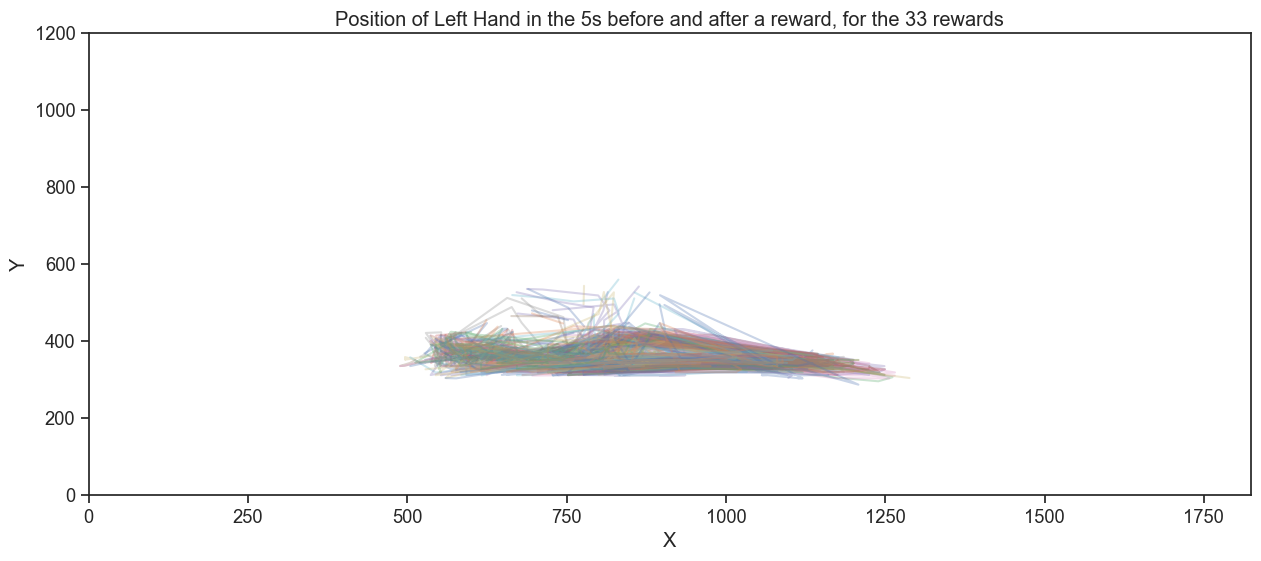

In [97]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = 1200-array[:, 1]
    plt.plot(x_coords, y_coords, label=f'Array {i}', alpha=0.3)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Position of Left Hand in the 5s before and after a reward, for the 33 rewards")
plt.xlim(0,1824)
plt.ylim(0,1200)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


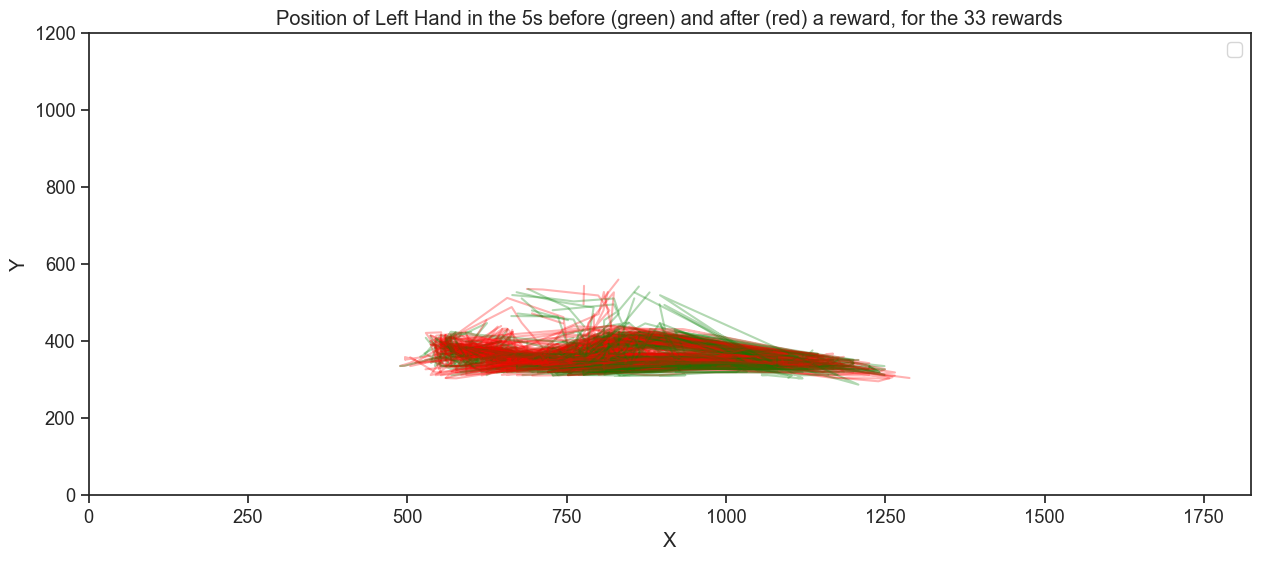

(300,)


In [108]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = 1200 - array[:, 1]

    # Separate the points into first 150 and last 150 positions
    first_150_mask = np.arange(len(array)) < 150
    last_150_mask = np.arange(len(array)) >= len(array) - 150

    # Plot the first 150 points in green
    plt.plot(x_coords[first_150_mask], y_coords[first_150_mask], alpha=0.3, color='green')

    # Plot the last 150 points in red
    plt.plot(x_coords[last_150_mask], y_coords[last_150_mask], alpha=0.3, color='red')

# Set plot labels and limits
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Position of Left Hand in the 5s before (green) and after (red) a reward, for the 33 rewards")
plt.xlim(0, 1824)
plt.ylim(0, 1200)

# Show the legend
plt.legend()

# Show the plot
plt.show()


print(first_150_mask.shape)

ValueError: x and y must be the same size

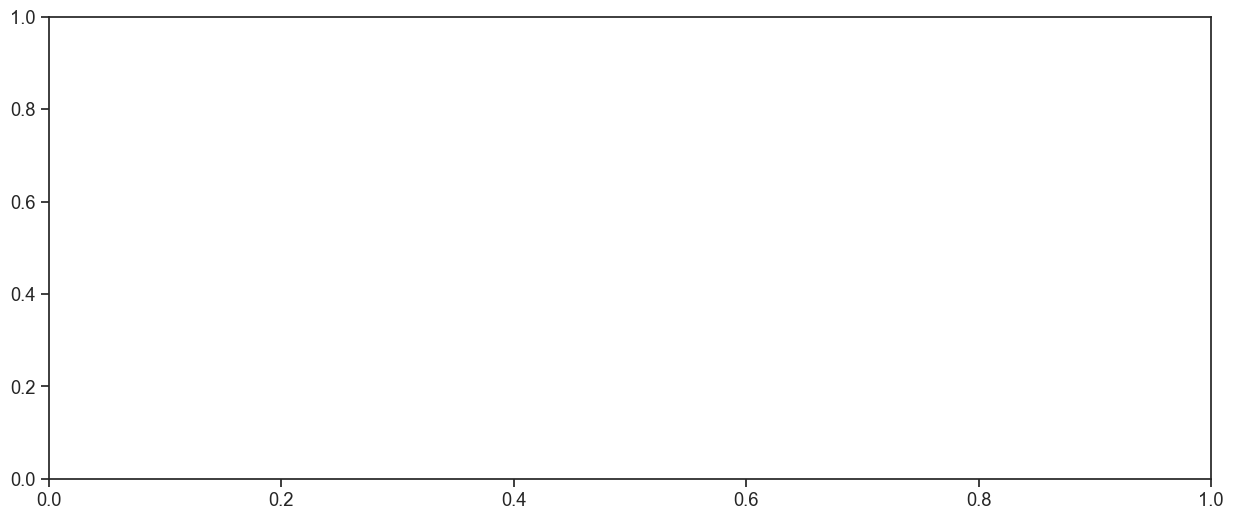

In [95]:
first_150_values = [arr[:149] for arr in position_arrays]
last_150_values = [arr[150:299] for arr in position_arrays]

for i in range(33):
    plt.scatter(first_150_values[i], color='green', label=f'Array {i+1}')

# Plotting the last 150 values of each array in red
for i in range(33):
    plt.scatter(range(150, 300), last_150_values[i], color='red')

# Set plot labels and legend
plt.xlabel('Position on Array')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Show the plot
plt.show()

C:\Users\delet\anaconda3\envs\sleap\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


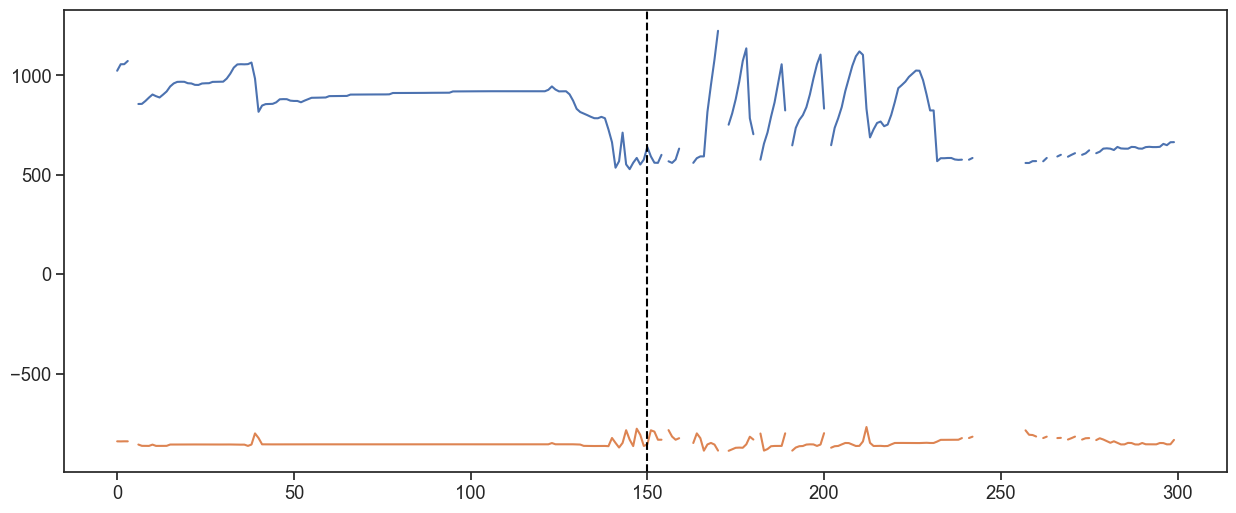

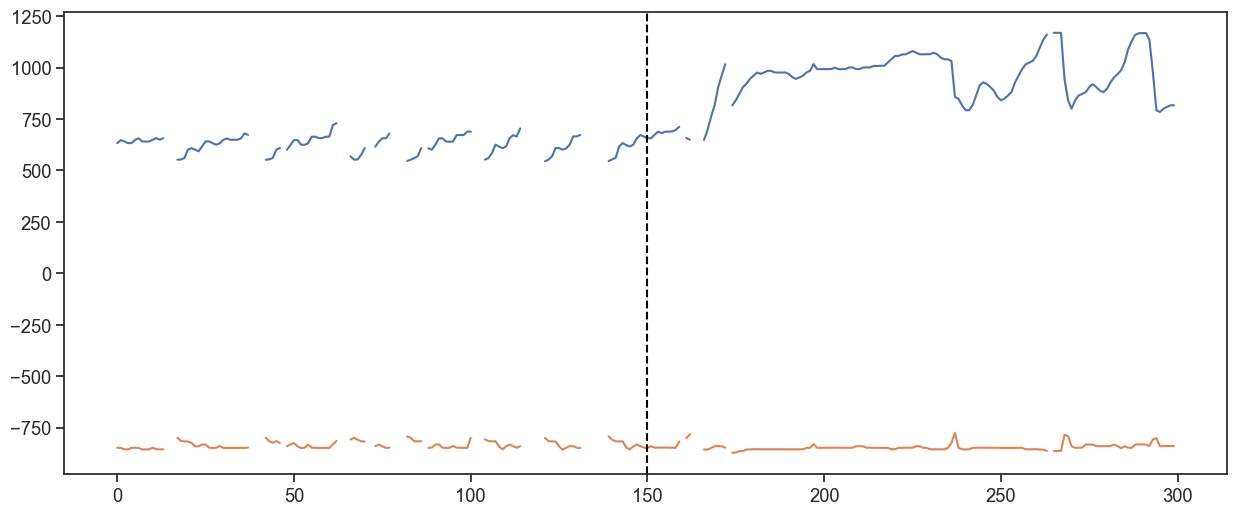

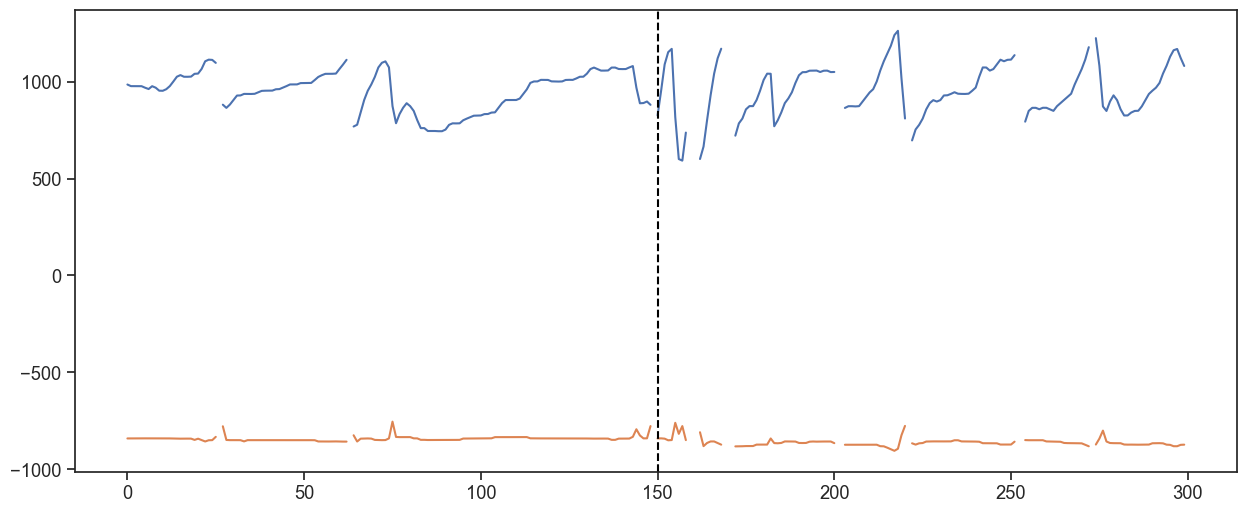

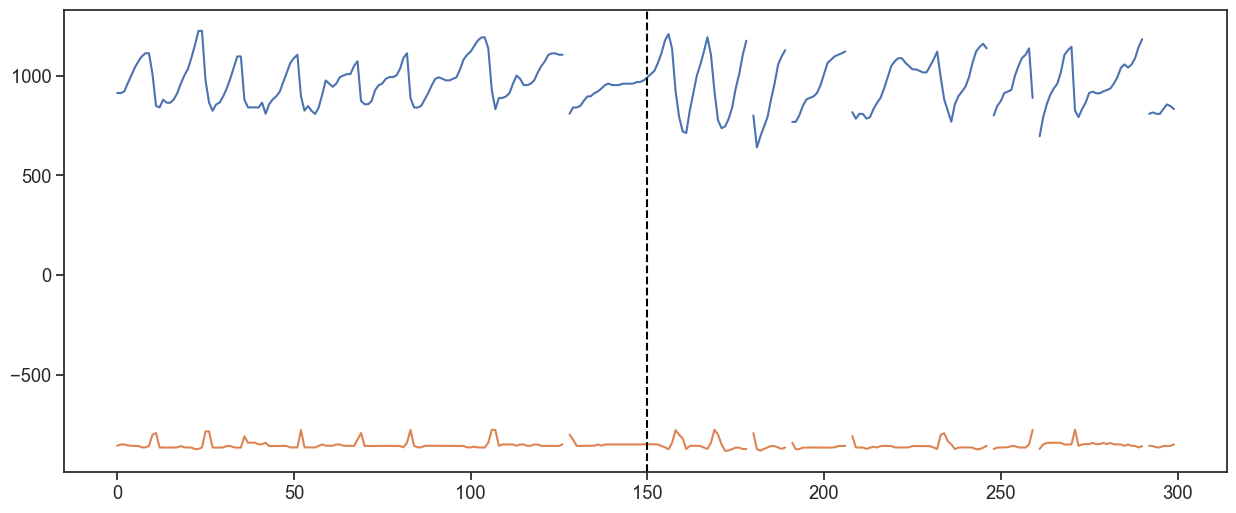

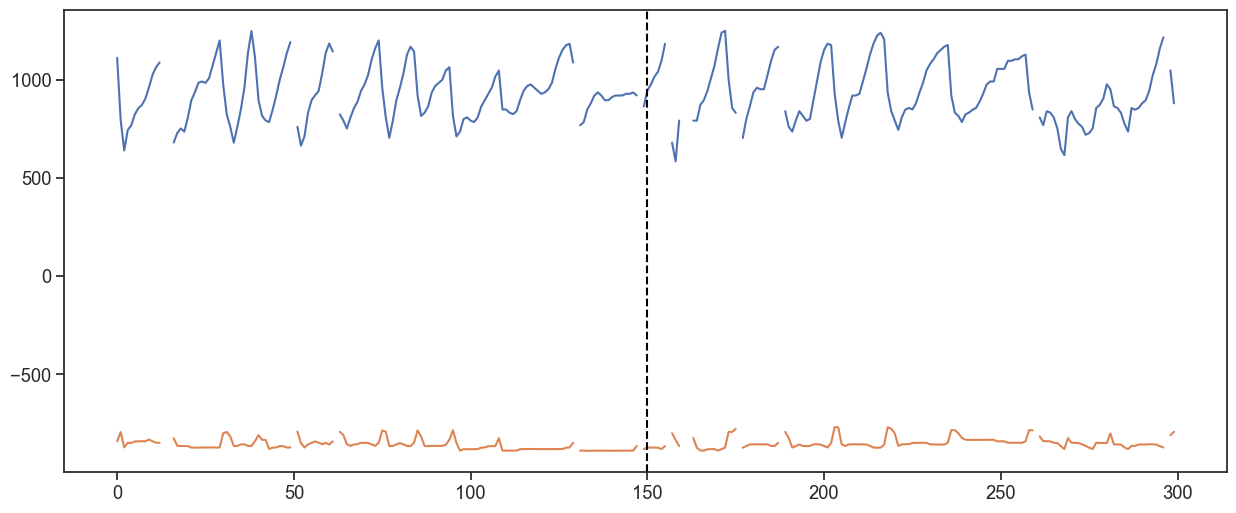

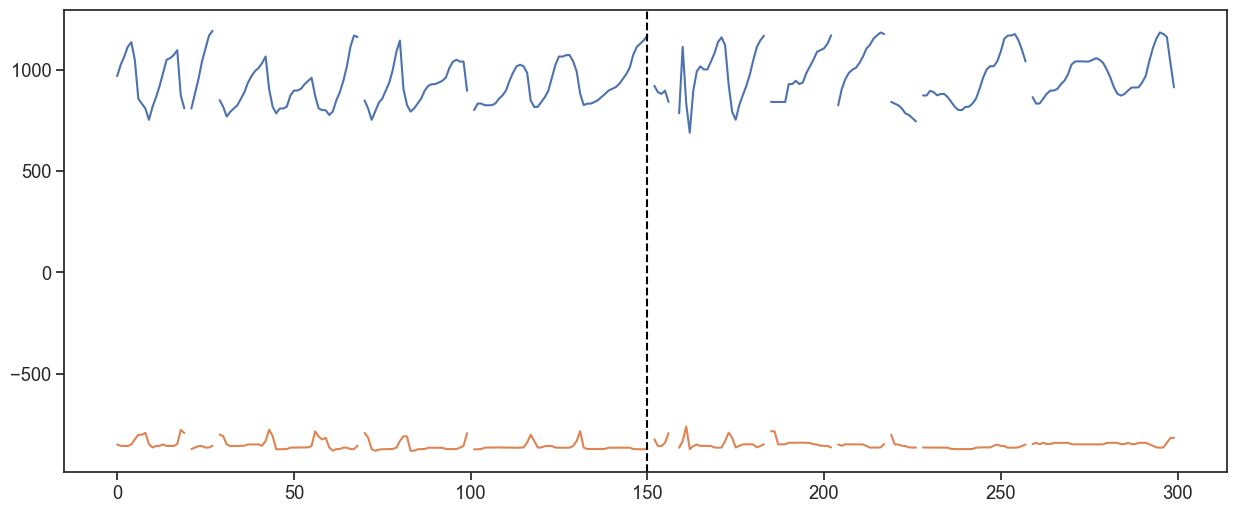

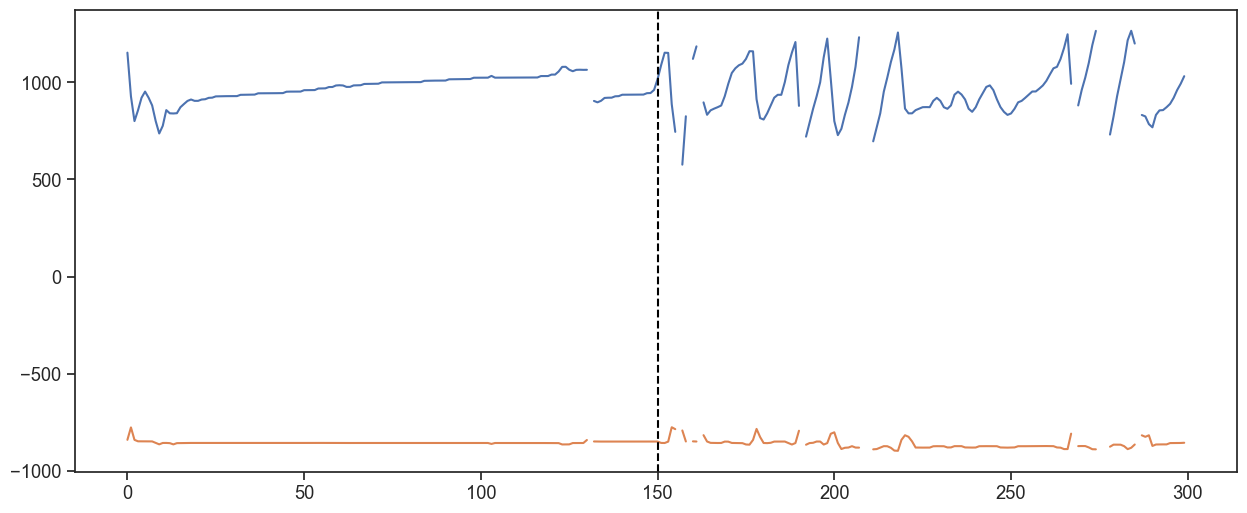

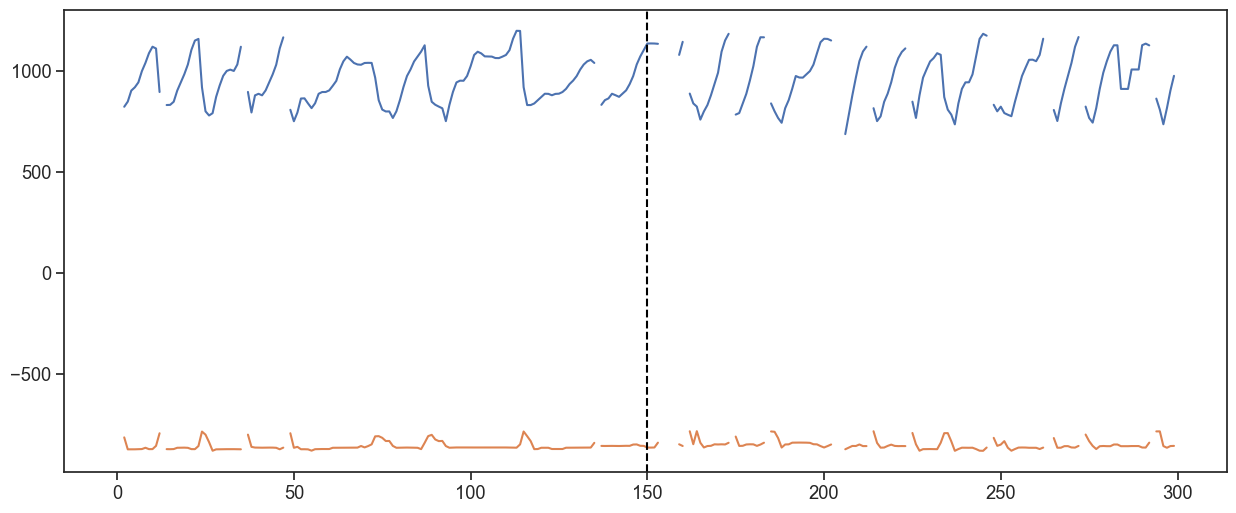

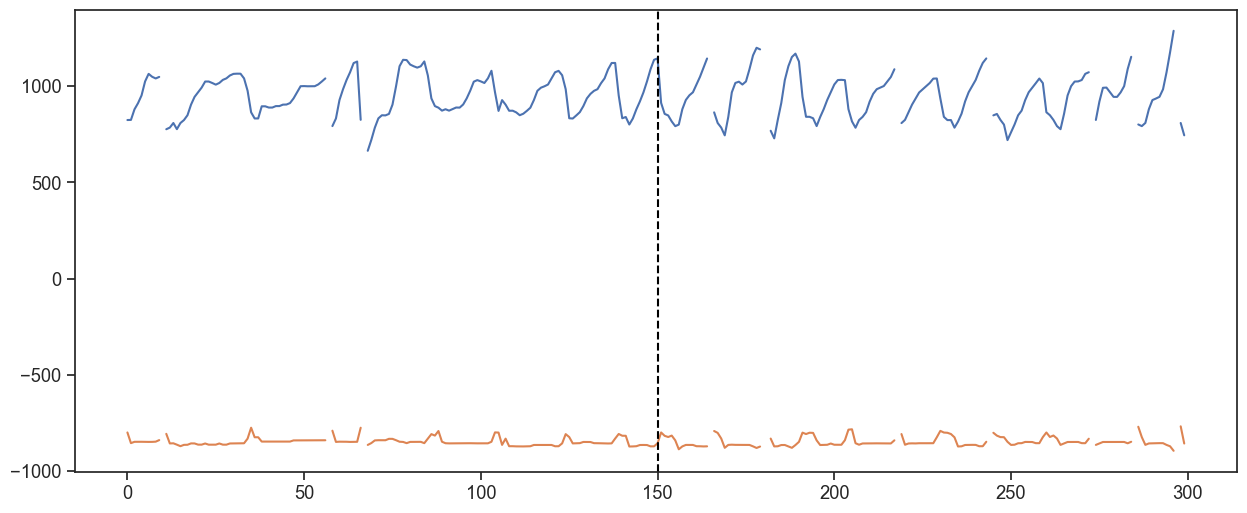

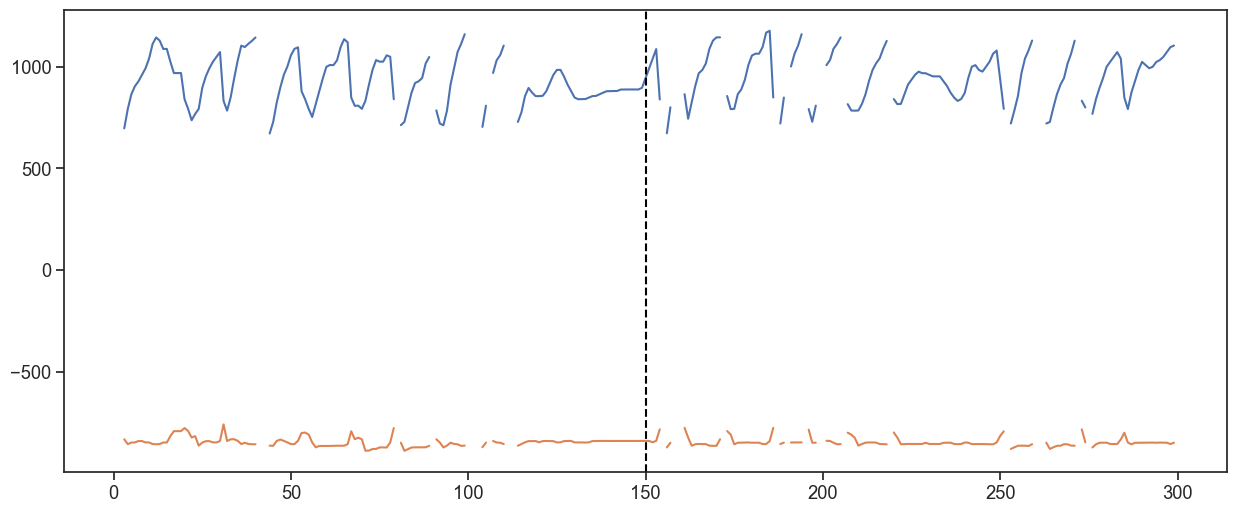

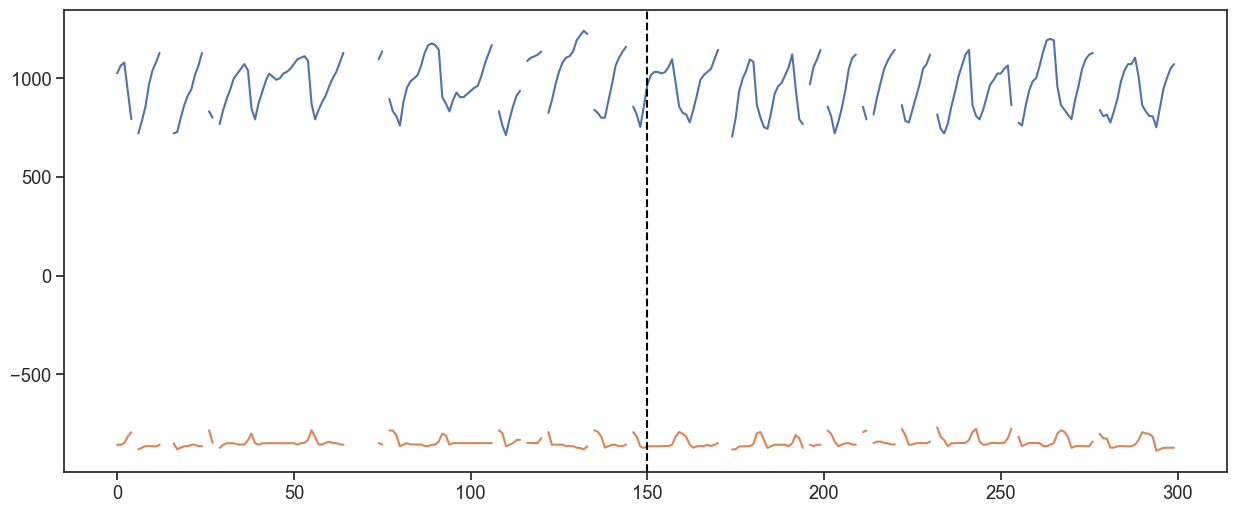

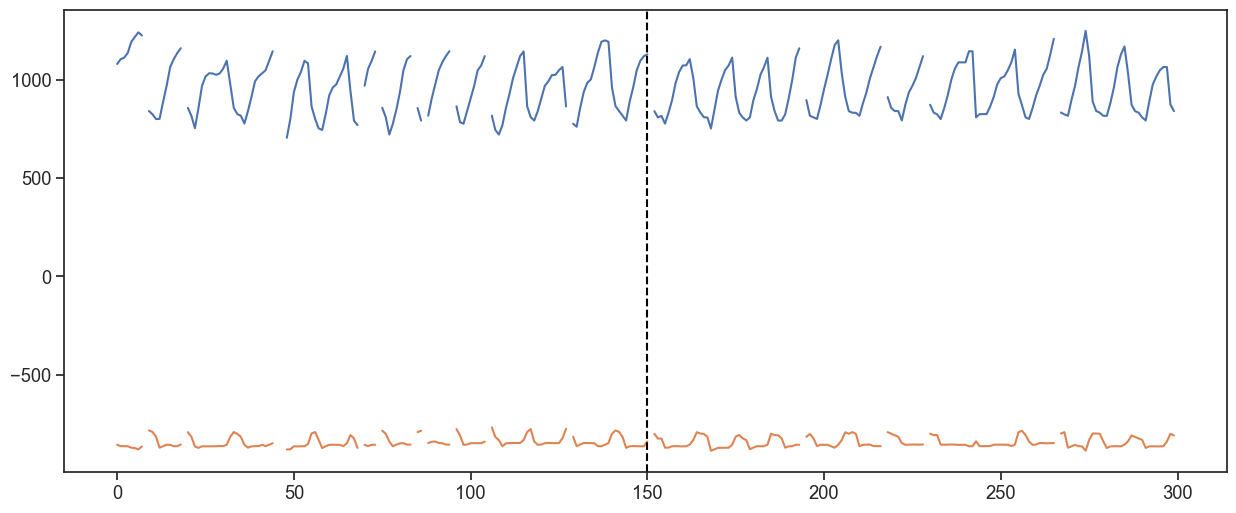

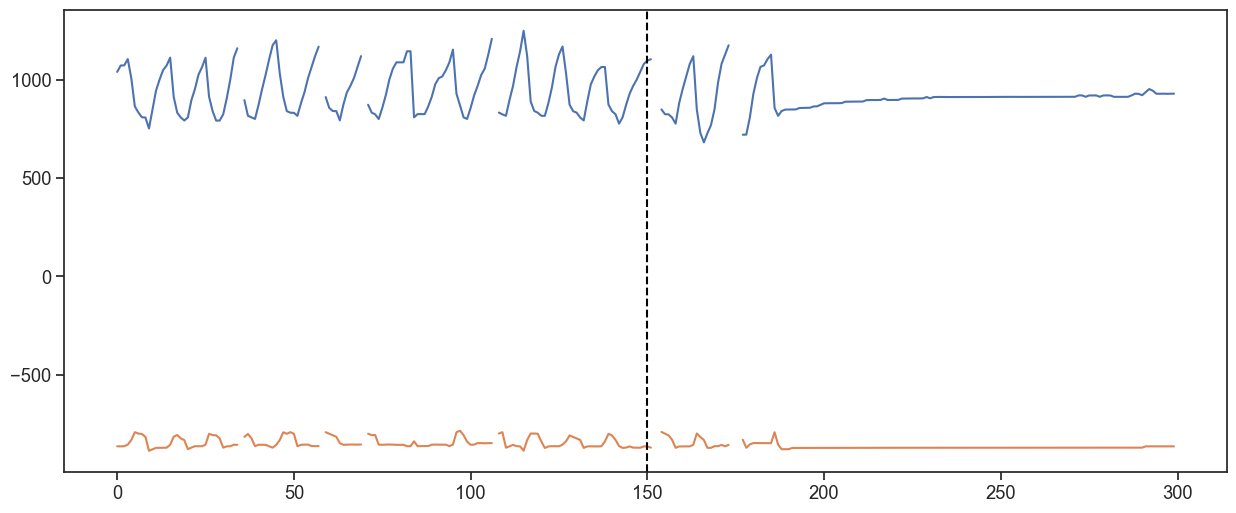

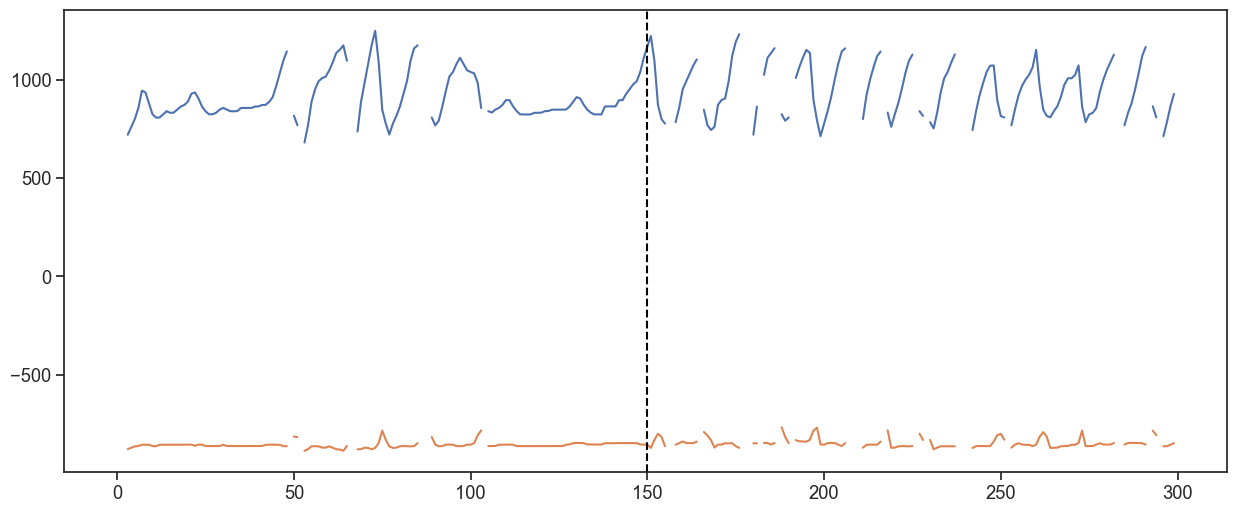

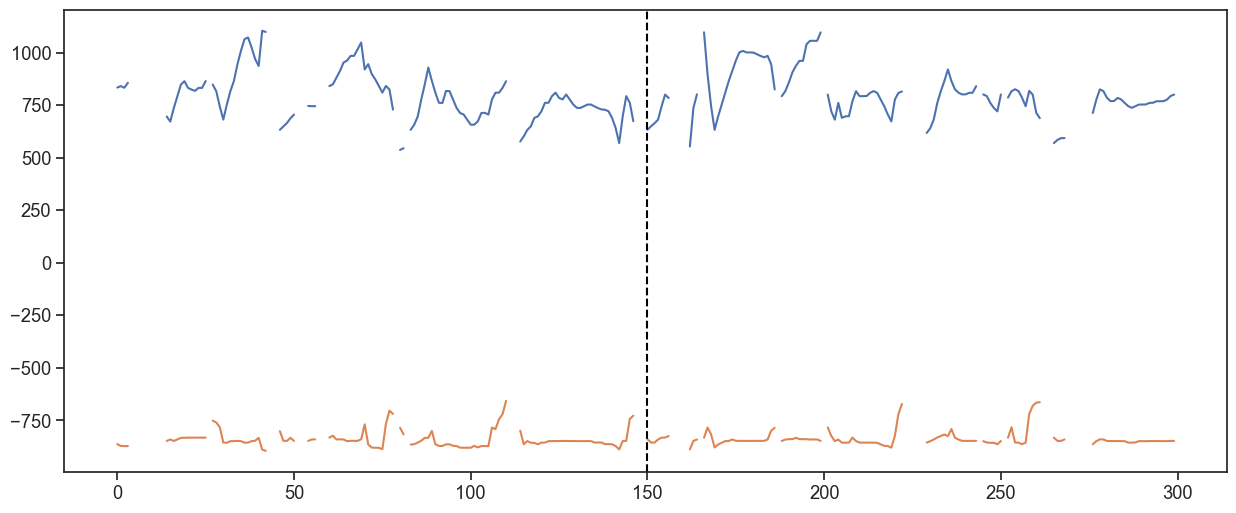

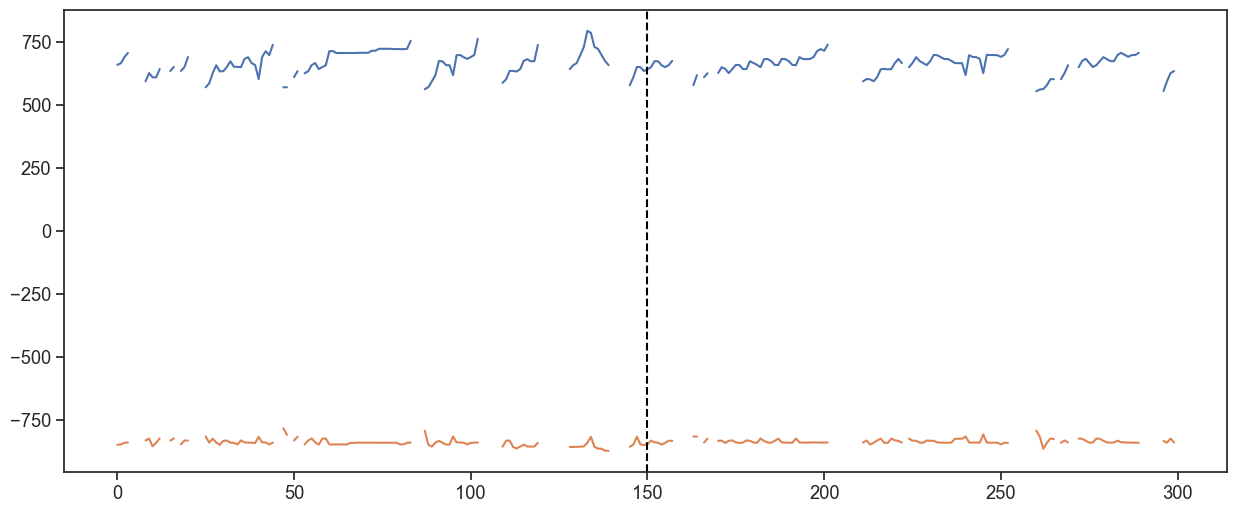

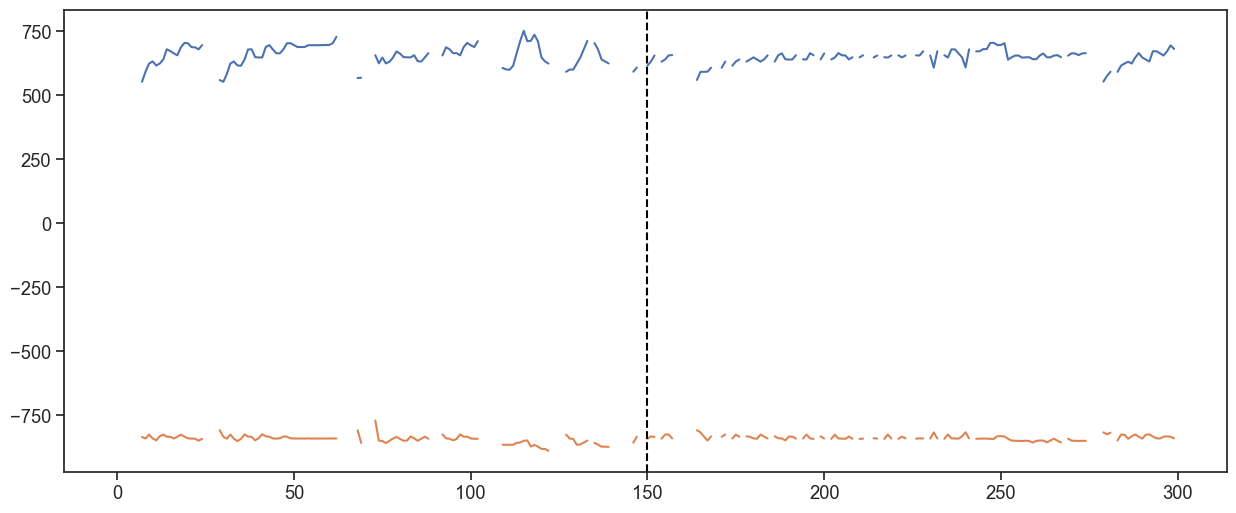

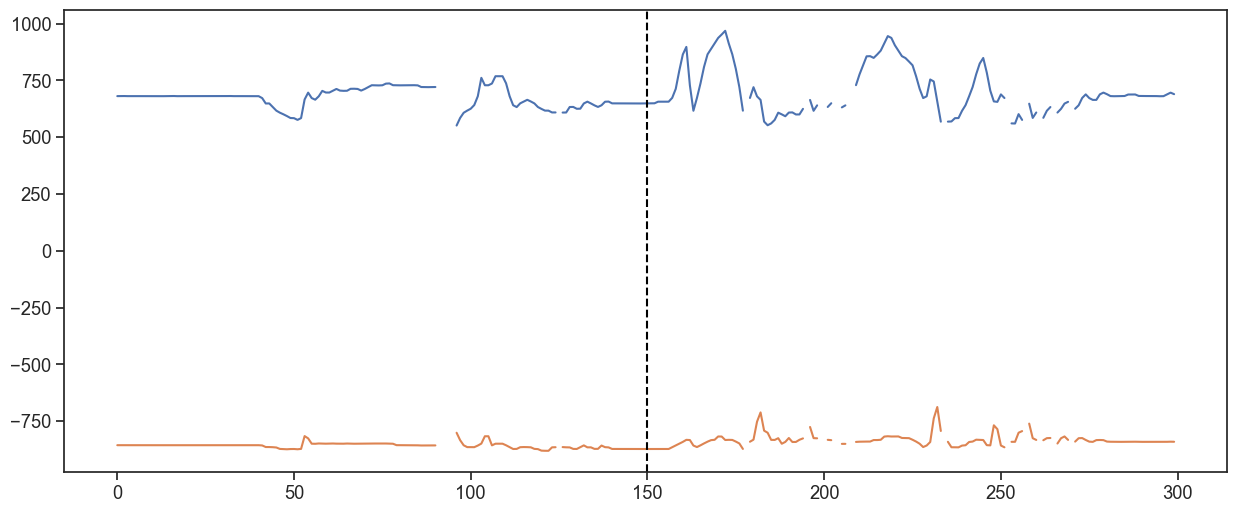

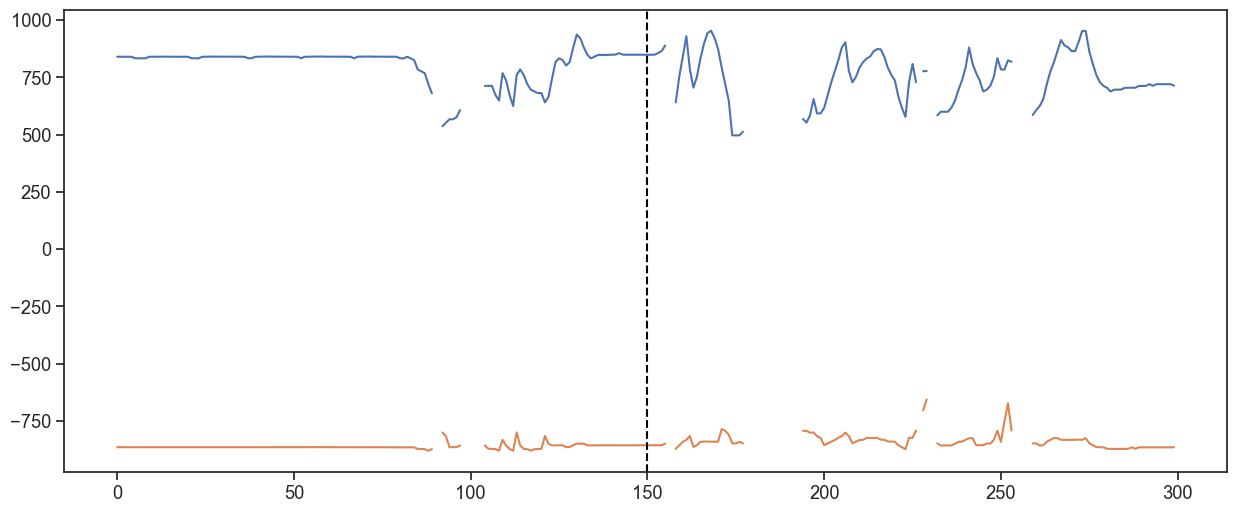

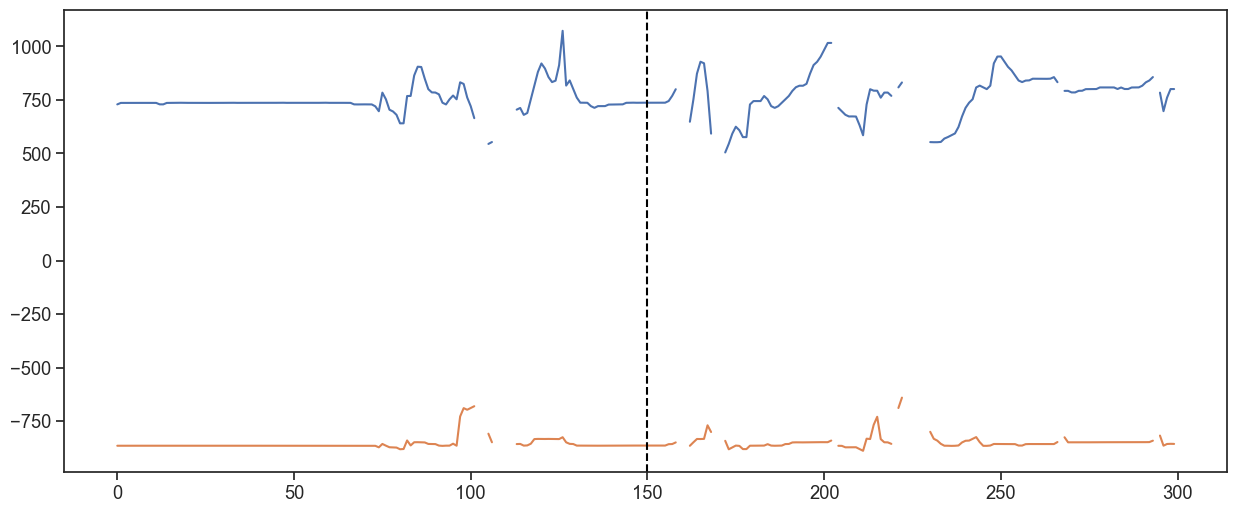

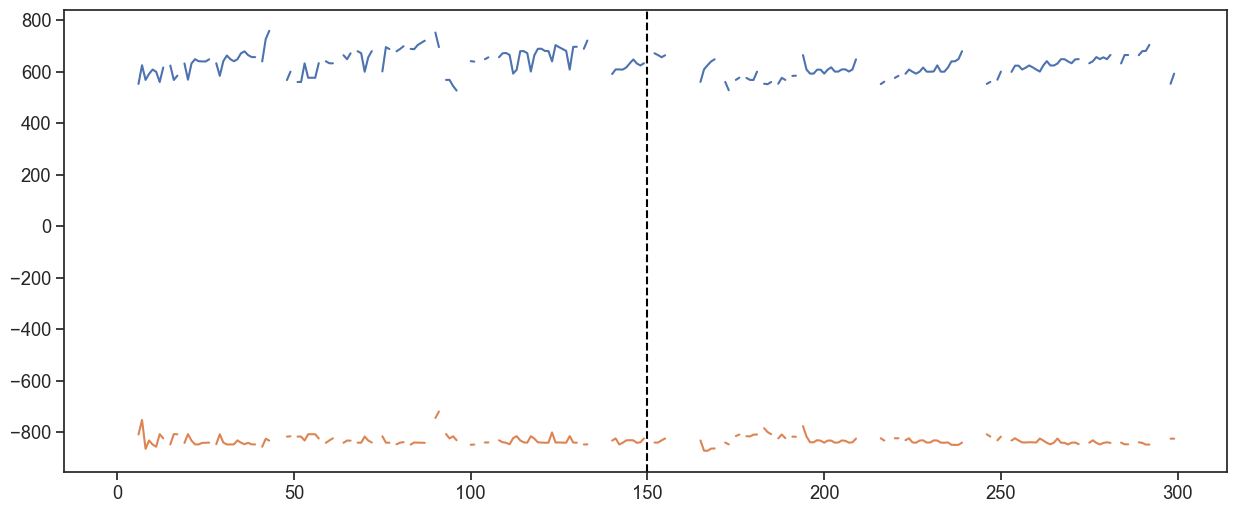

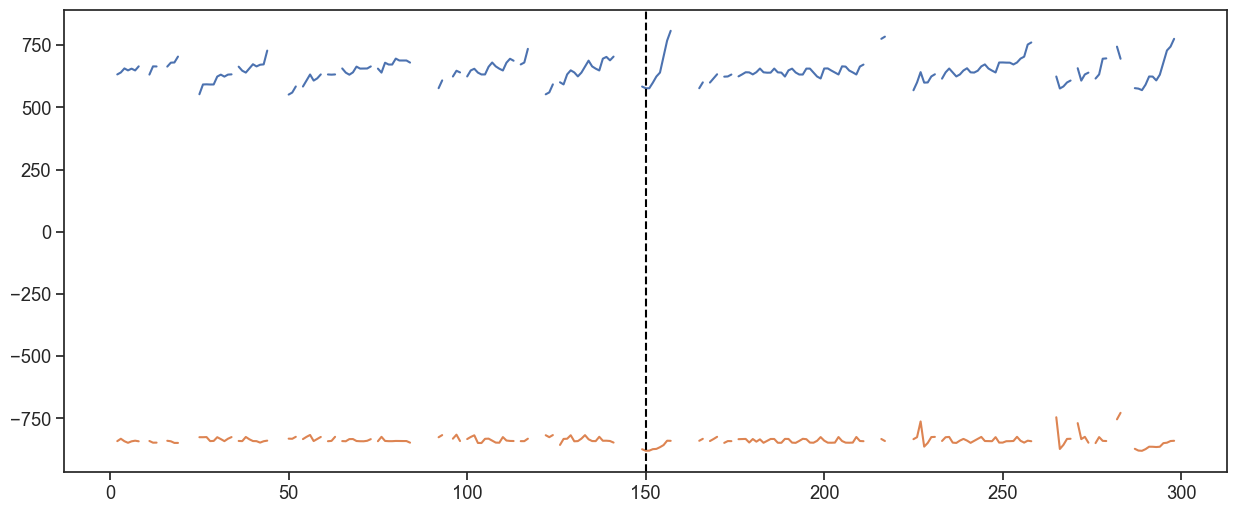

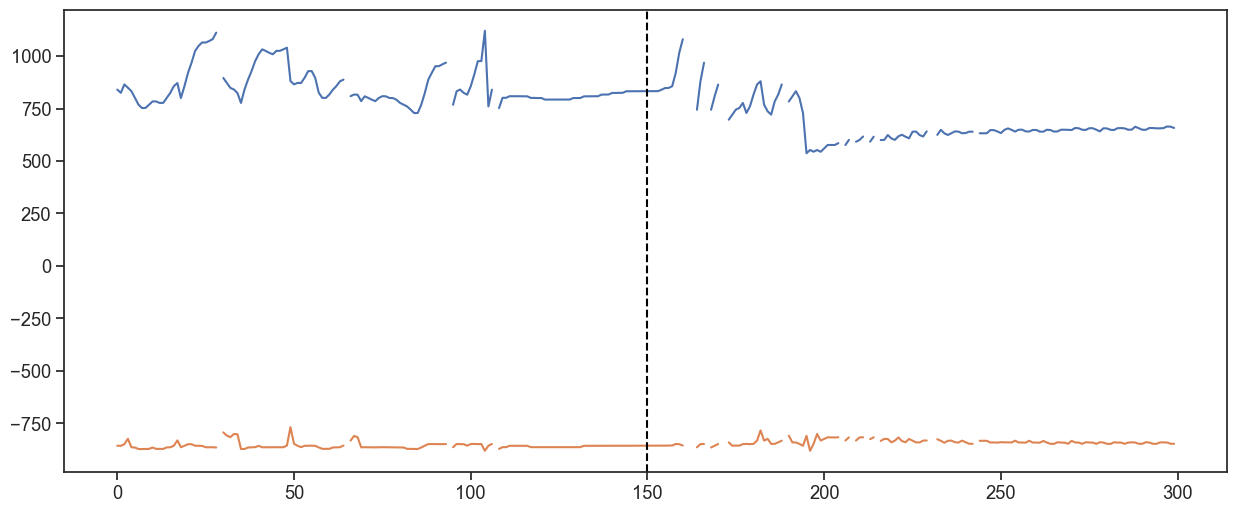

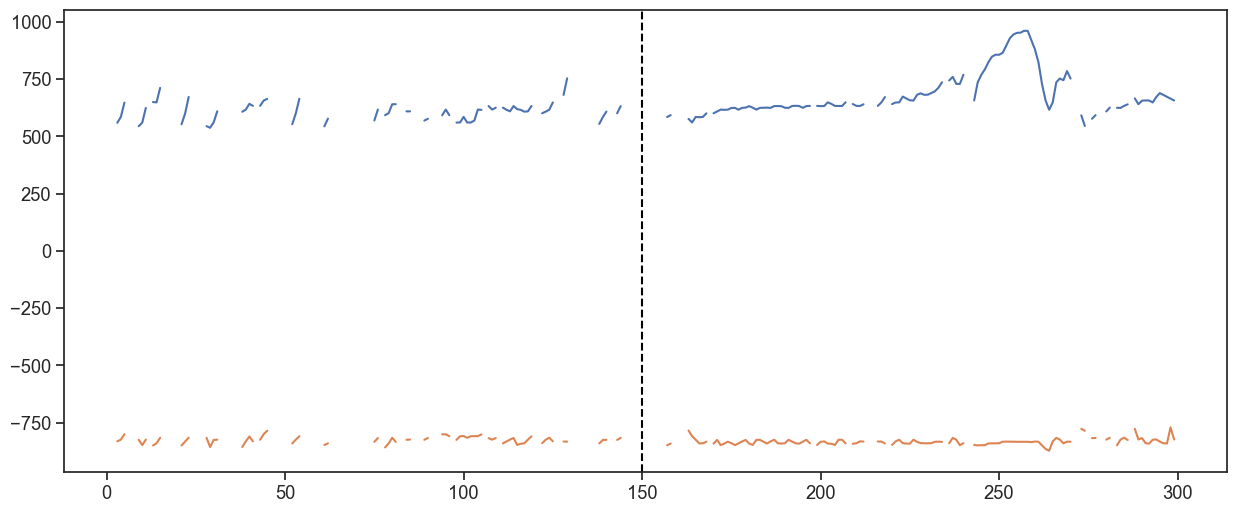

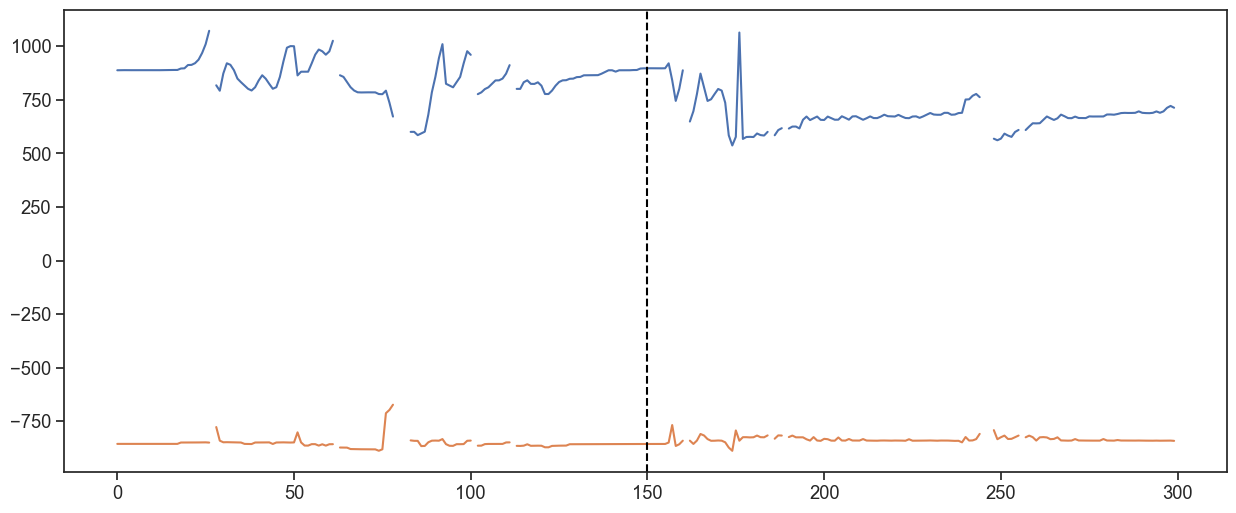

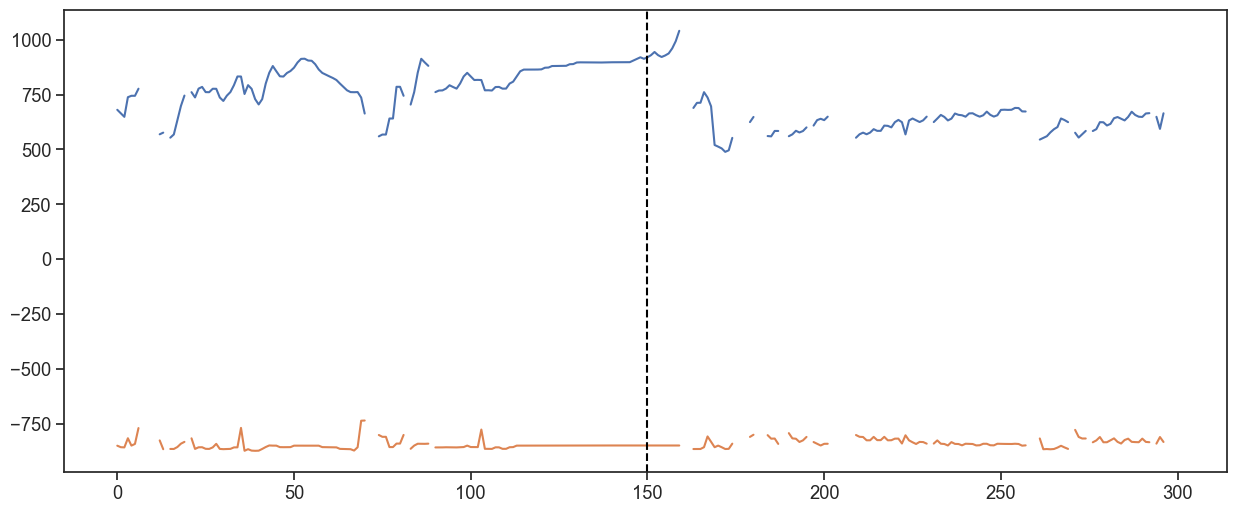

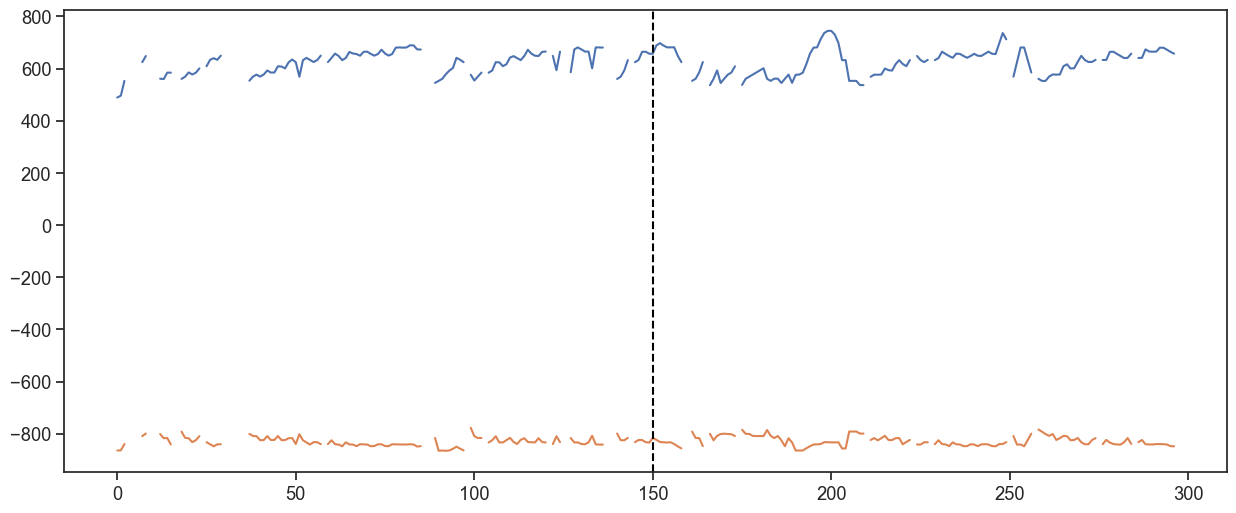

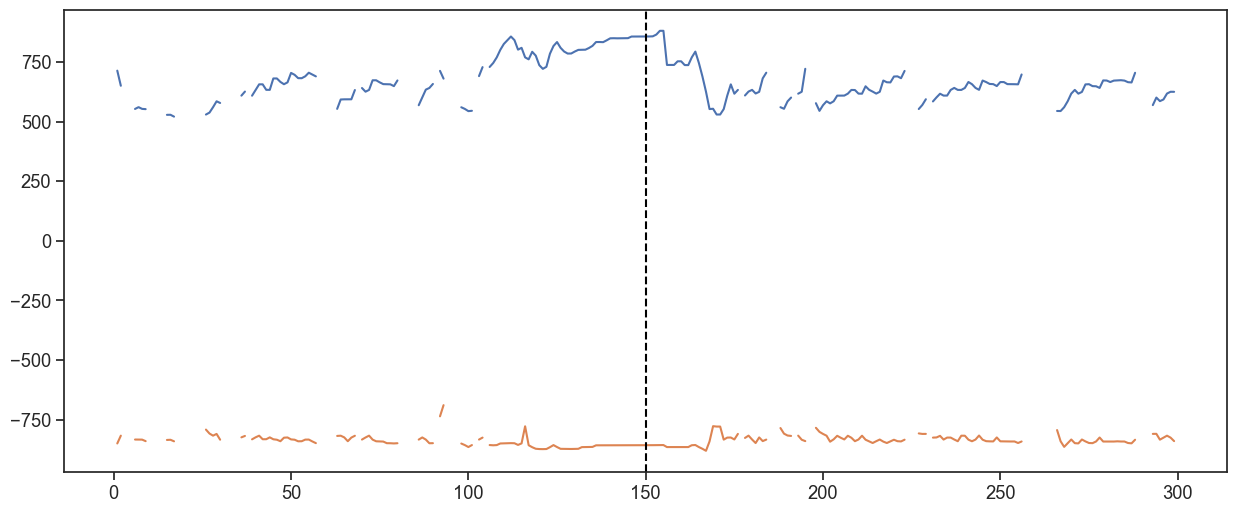

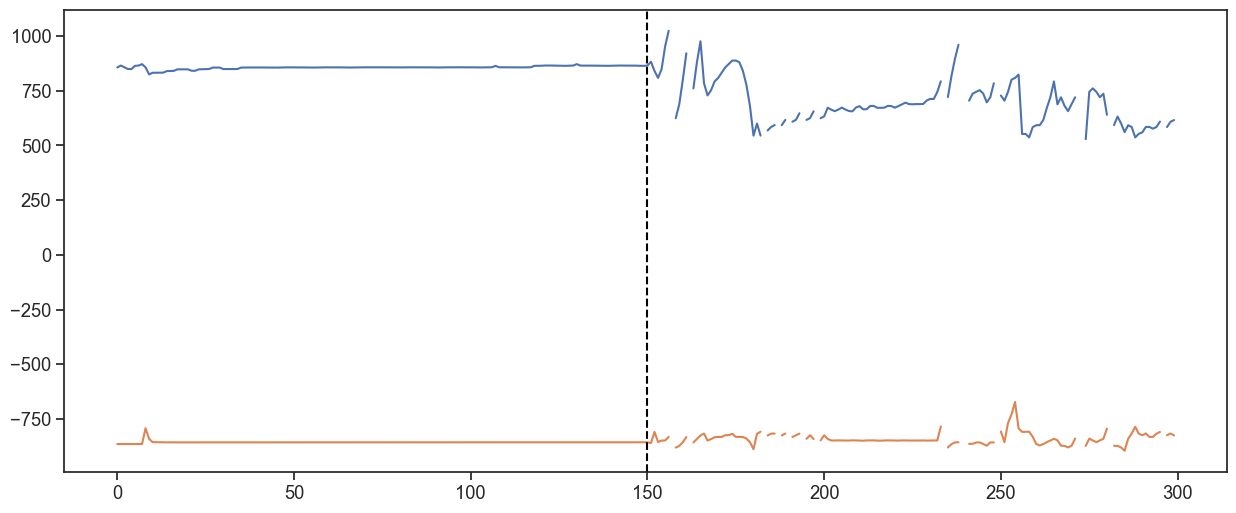

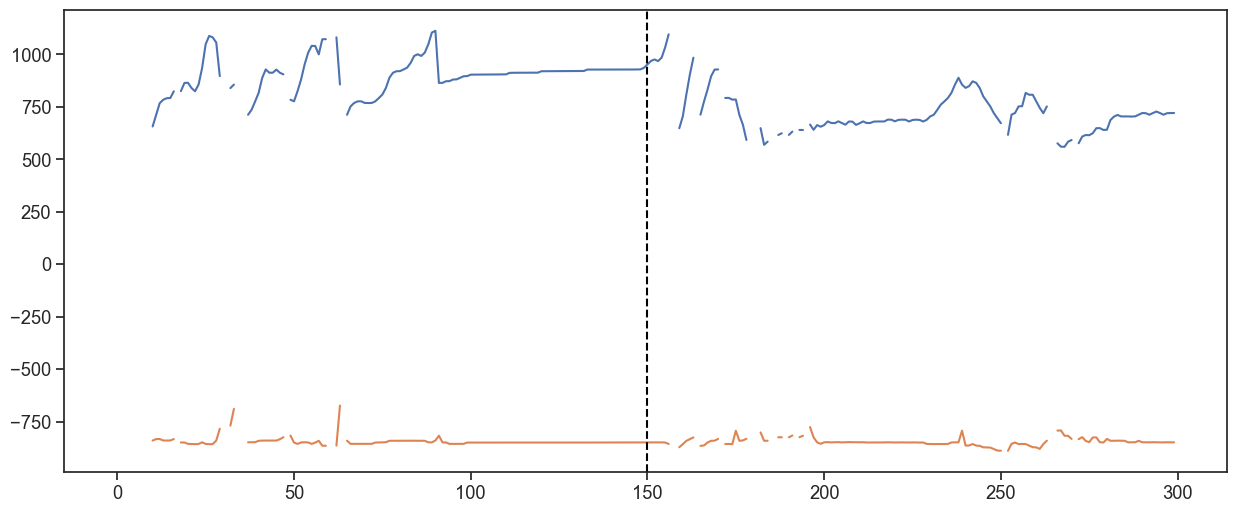

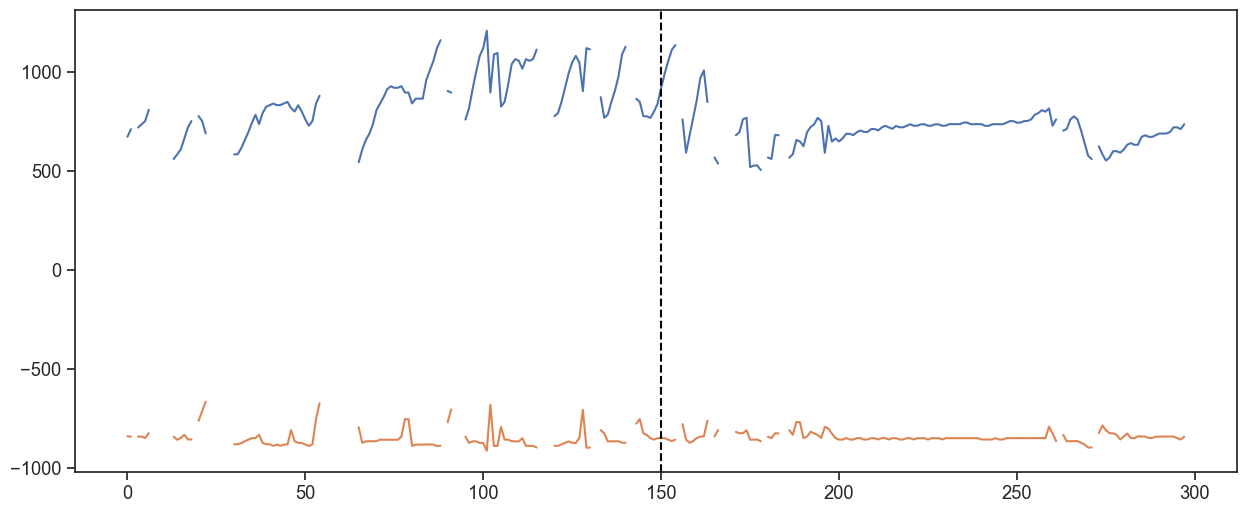

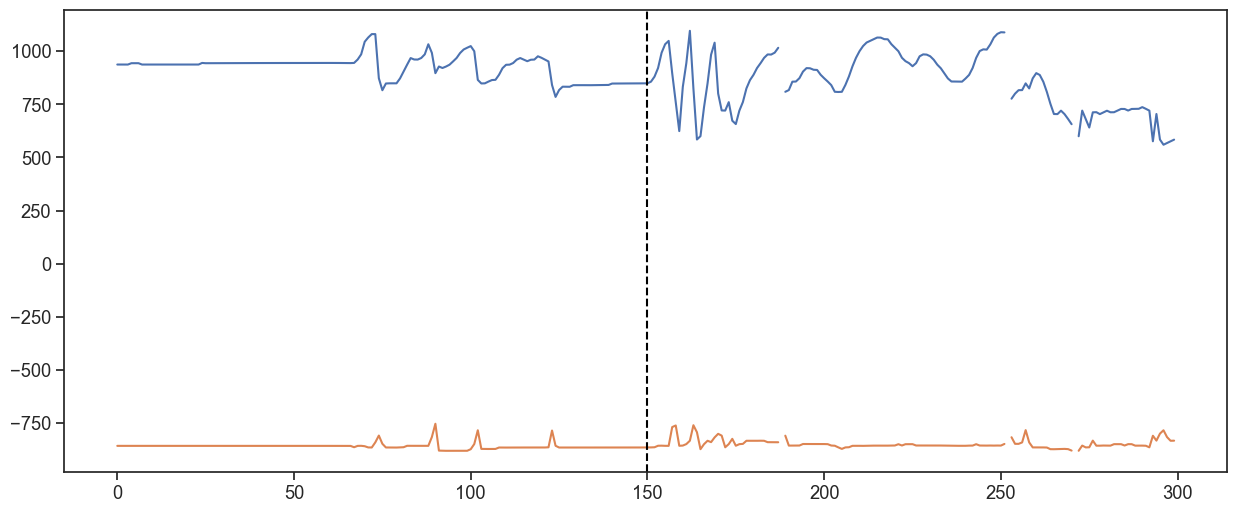

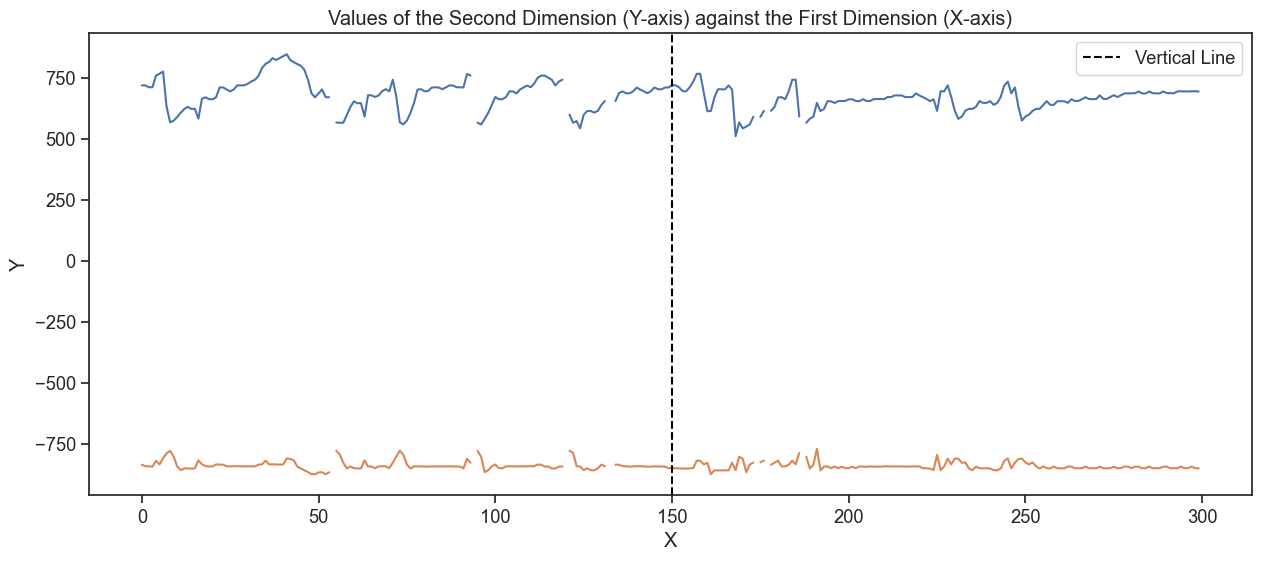

In [76]:
for i, array in enumerate(position_arrays):
    x_coords = array[:, 0]
    y_coords = array[:, 1]
    
    plt.figure()
    plt.plot(x_coords)
    plt.plot(-1*y_coords)
    plt.axvline(x=150, color='black', linestyle='--', label='Vertical Line')

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Values of the Second Dimension (Y-axis) against the First Dimension (X-axis)")
plt.legend()
plt.show()

In [36]:
mean_array = np.mean(event_arrays, axis=0)
print(len(mean_array))

1500


In [37]:




mean_array_5s_nose = np.mean(event_arrays_5s_tongue, axis=0)
max_mean_array_5s_nose=np.max(mean_array_5s_nose)
mean_array_5s_nose_norm=mean_array_5s_nose/max_mean_array_5s_nose


mean_array_5s_mouth = np.mean(event_arrays_5s_mouth, axis=0)
max_mean_array_5s_mouth=np.max(mean_array_5s_mouth)
mean_array_5s_mouth_norm=mean_array_5s_mouth/max_mean_array_5s_mouth




mean_array_5s_tongue = np.mean(event_arrays_5s_tongue, axis=0)
max_mean_array_5s_tongue=np.max(mean_array_5s_tongue)
mean_array_5s_tongue_norm=mean_array_5s_tongue/max_mean_array_5s_tongue





mean_array_5s_leftfoot = np.mean(event_arrays_5s_leftfoot, axis=0)
max_mean_array_5s_leftfoot=np.max(mean_array_5s_leftfoot)
mean_array_5s_leftfoot_norm=mean_array_5s_leftfoot/max_mean_array_5s_leftfoot




mean_array_5s_righthand = np.mean(event_arrays_5s_righthand, axis=0)
max_mean_array_5s_righthand=np.max(mean_array_5s_righthand)
mean_array_5s_righthand_norm=mean_array_5s_righthand/max_mean_array_5s_righthand

      
      
mean_array_5s_ear = np.mean(event_arrays_5s_ear, axis=0)
max_mean_array_5s_ear=np.max(mean_array_5s_ear)
mean_array_5s_ear_norm=mean_array_5s_ear/max_mean_array_5s_ear



In [38]:
mean_array_5s = np.mean(event_arrays_5s, axis=0)
max_mean_array_5s=np.max(mean_array_5s)
mean_array_5s_norm=mean_array_5s/max_mean_array_5s

print(len(mean_array_5s))

300


In [39]:
print(event_arrays_5s[32].ndim)

1


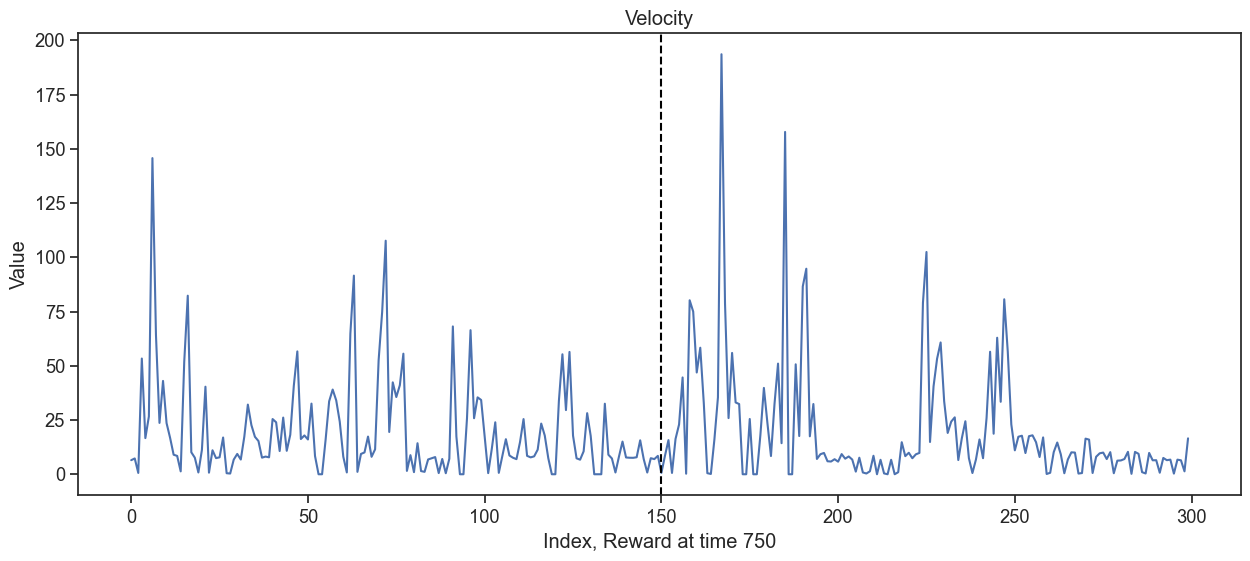

In [40]:
plt.plot(event_arrays_5s[32])
plt.xlabel("Index, Reward at time 750")
plt.ylabel("Value")
plt.title("Velocity")
plt.axvline(x=150, color='black', linestyle='--', label='Vertical Line')

plt.show()

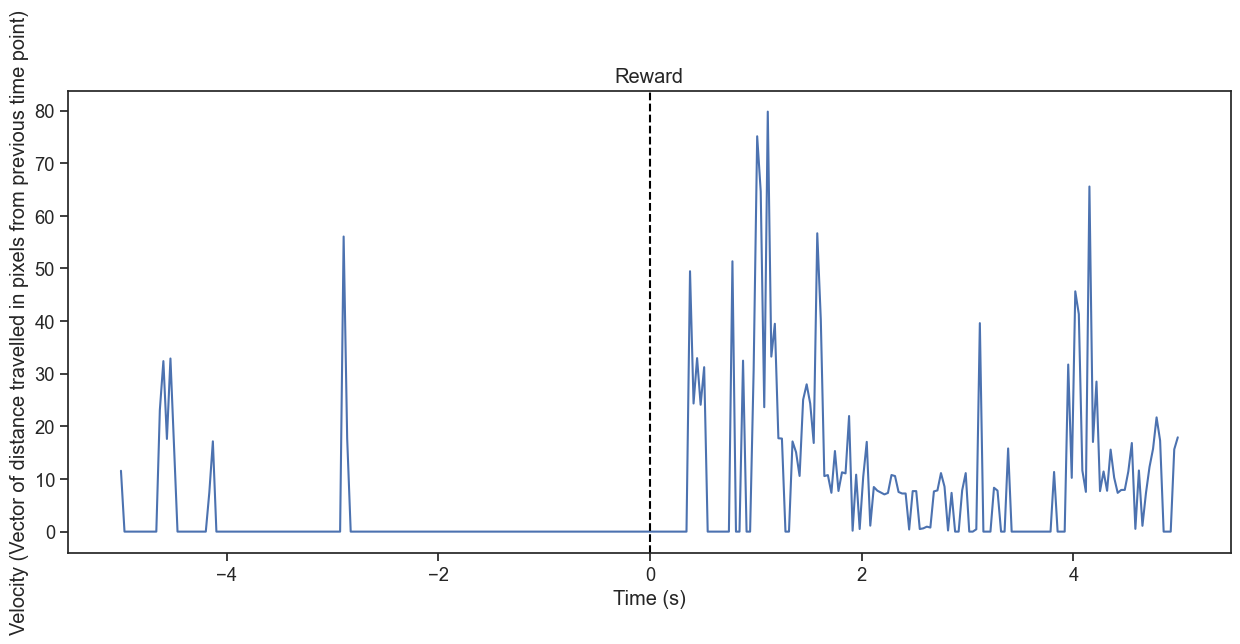

In [41]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds,event_arrays_5s_tongue[30])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

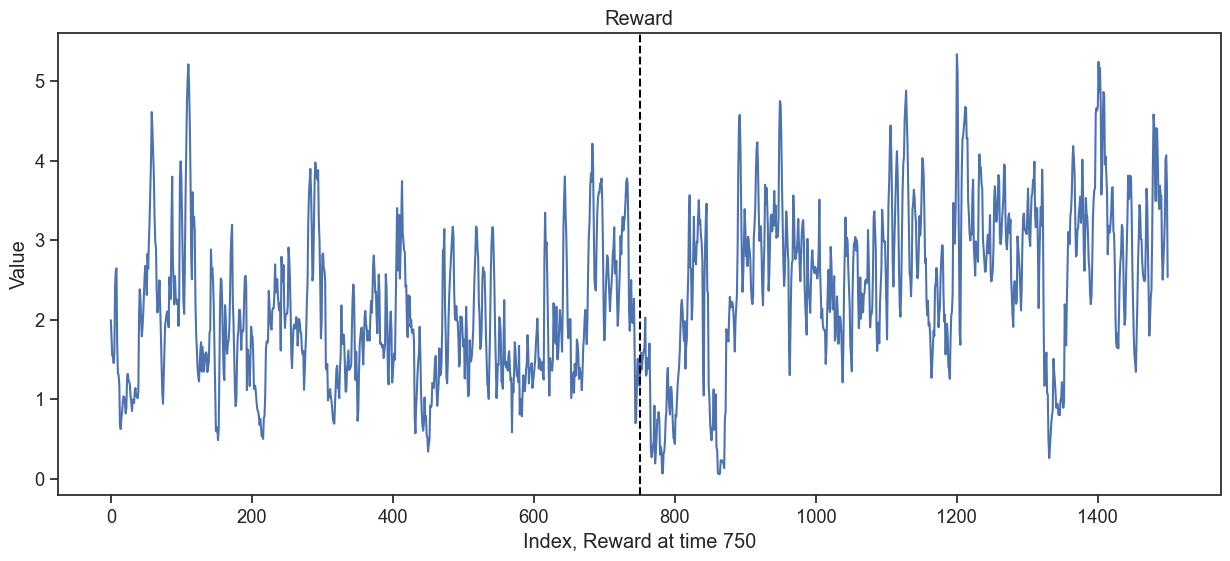

In [42]:
plt.plot(mean_array)
plt.xlabel("Index, Reward at time 750")
plt.ylabel("Value")
plt.title("Reward")
plt.axvline(x=750, color='black', linestyle='--', label='Vertical Line')

plt.show()

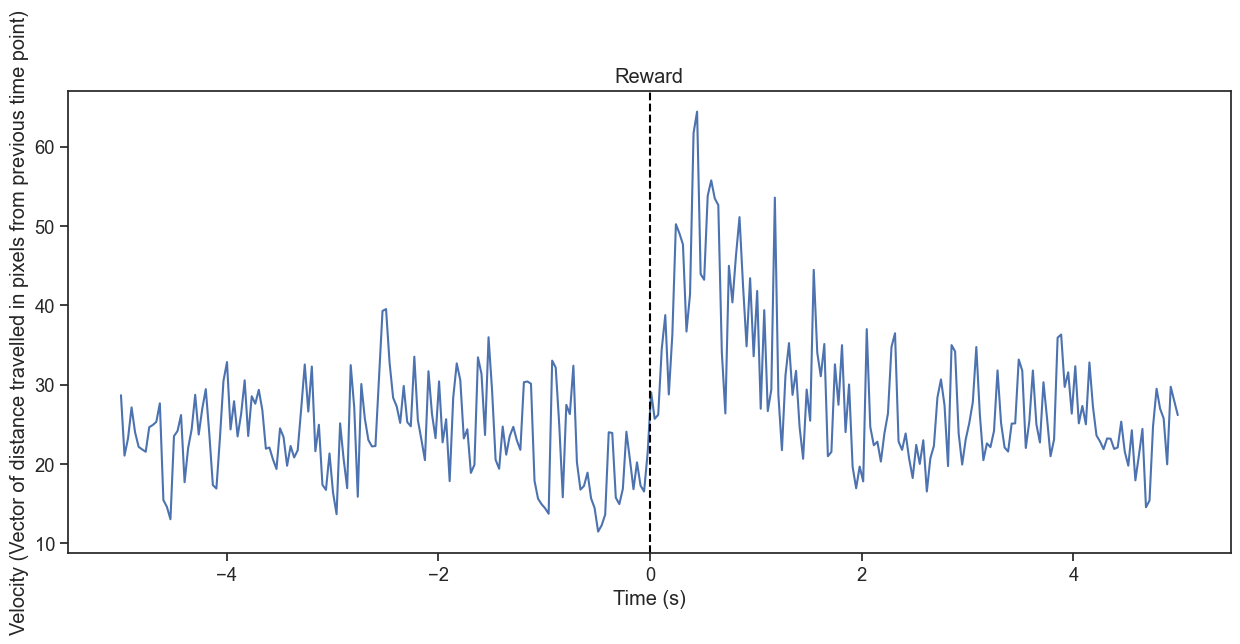

In [43]:
time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

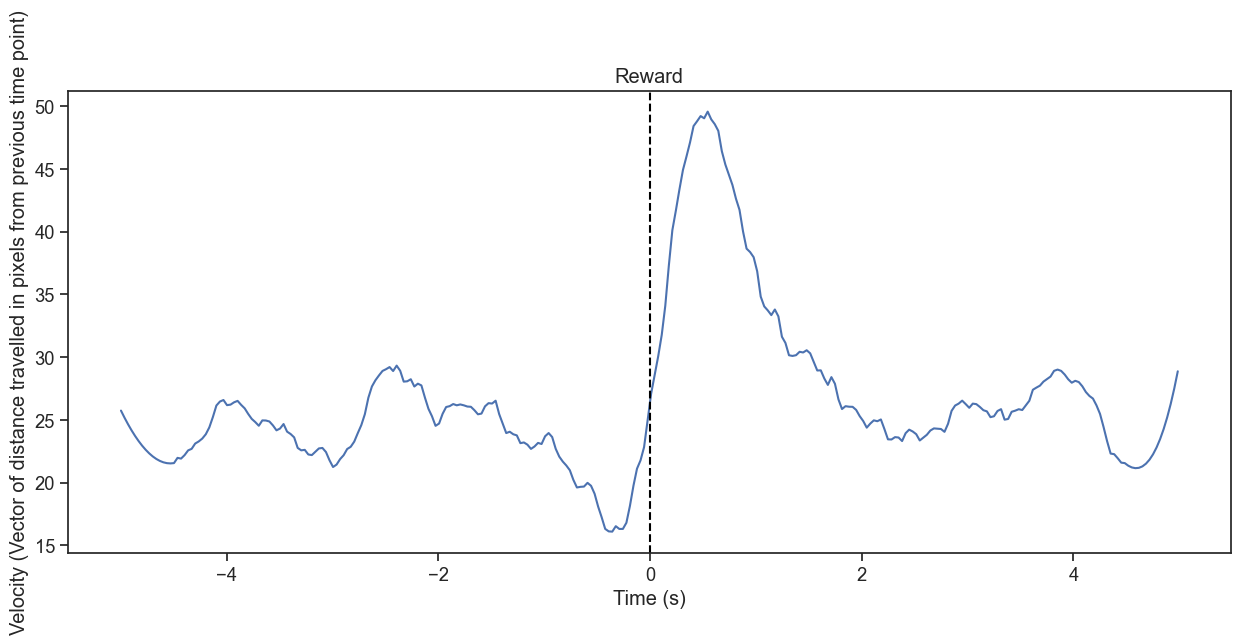

In [44]:
time_seconds = np.arange(-5, 5, 0.0334)
mean_array_5s_filtered=savgol_filter(mean_array_5s,31,3)



plt.plot(time_seconds, mean_array_5s_filtered)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.show()

In [45]:
import seaborn as sns

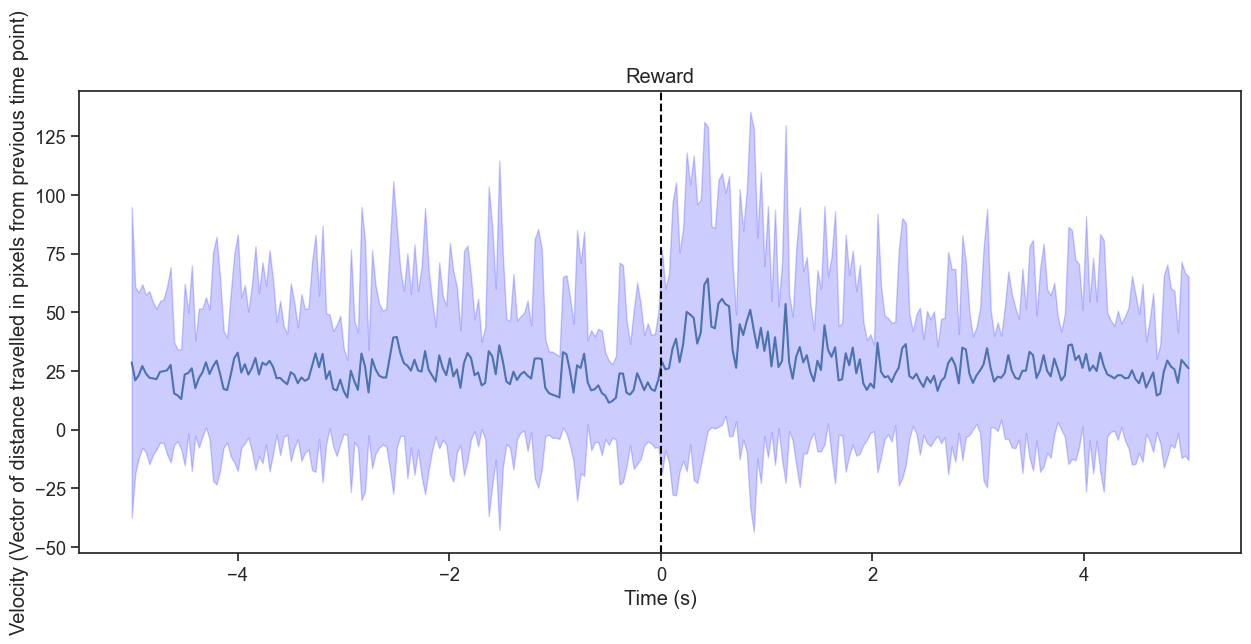

In [46]:
event_arrays_5s_stack=np.stack(event_arrays_5s)
std = np.std(event_arrays_5s_stack, axis=0)

time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.fill_between(time_seconds, mean_array_5s - std , mean_array_5s + std, alpha=0.2, color='blue')

plt.show()

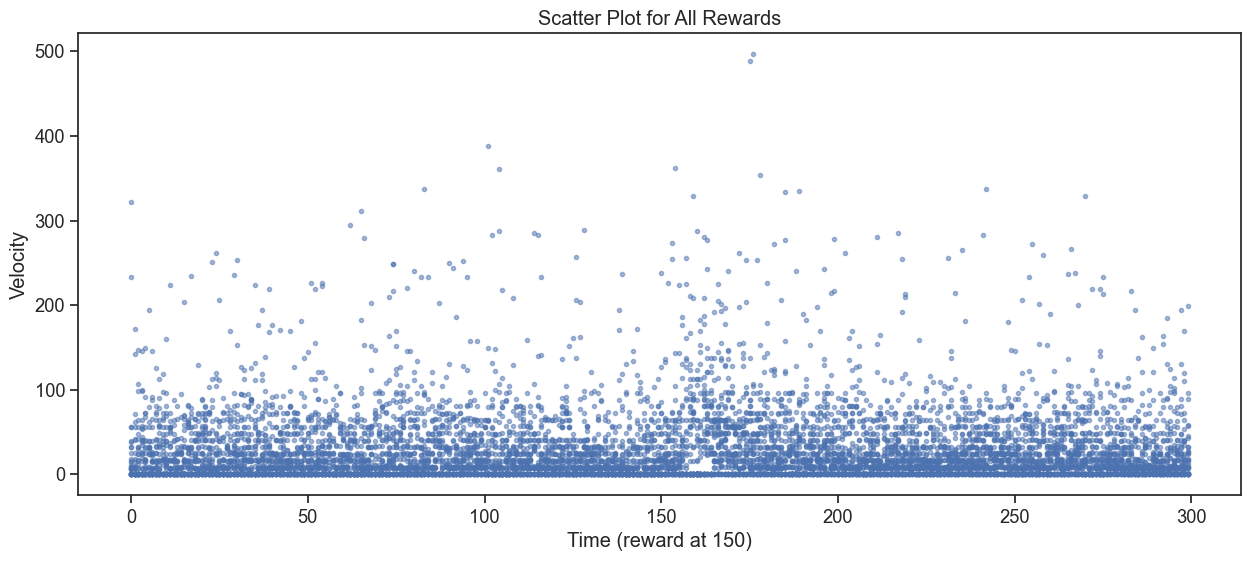

In [68]:
event_arrays_5s_conc=np.concatenate(event_arrays_5s)

x_values = np.tile(np.arange(300), 33) 
y_values = event_arrays_5s_conc

plt.scatter(x_values, y_values, marker='.', alpha=0.5)

# Add labels and title
plt.xlabel('Time (reward at 150)')
plt.ylabel('Velocity')
plt.title('Scatter Plot for All Rewards')

# Show the plot
plt.show()

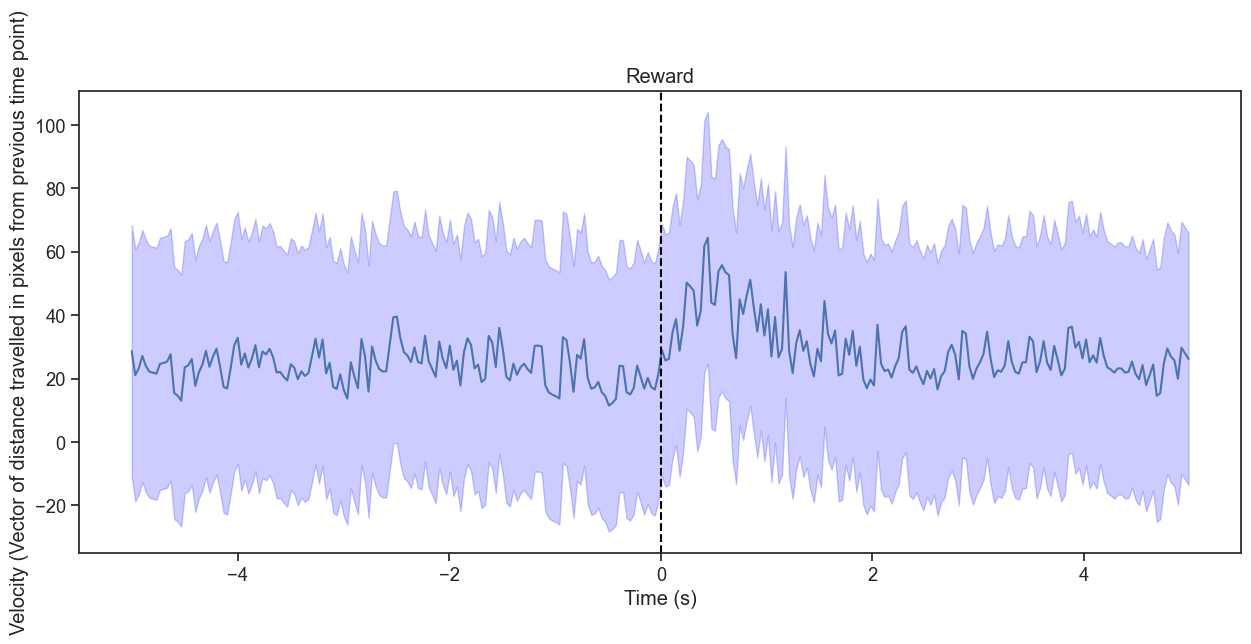

In [49]:
std = np.std(event_arrays_5s_conc, axis=0)

time_seconds = np.arange(-5, 5, 0.0334)

plt.plot(time_seconds, mean_array_5s)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (Vector of distance travelled in pixels from previous time point)")
plt.title("Reward")
plt.axvline(x=0, color='black', linestyle='--', label='Vertical Line')

plt.fill_between(time_seconds, mean_array_5s - std , mean_array_5s + std, alpha=0.2, color='blue')

plt.show()

In [69]:
print(event_arrays_5s_conc.shape)

(9900,)


In [51]:
print(event_arrays_5s_conc)

[32.7271632   0.51163571 16.19043128 ...  6.42228952  1.33913292
 16.54725192]


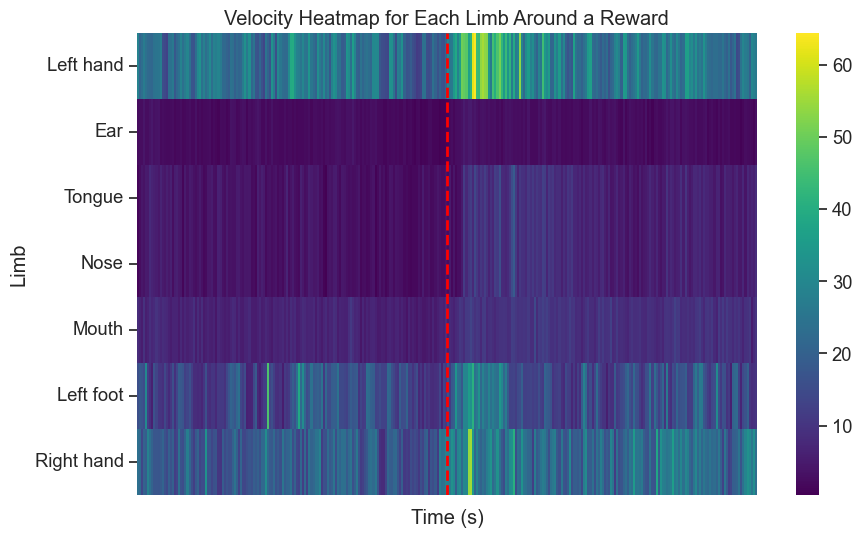

In [52]:
velocities=np.vstack([mean_array_5s, mean_array_5s_ear, mean_array_5s_tongue,mean_array_5s_nose,mean_array_5s_mouth,mean_array_5s_leftfoot,mean_array_5s_righthand])

plt.figure(figsize=(10, 6))
sns.heatmap(velocities, cmap='viridis', xticklabels=False, yticklabels=['Left hand', 'Ear', 'Tongue','Nose', 'Mouth', 'Left foot', 'Right hand'])
plt.axvline(150, color='red', linewidth=2, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Limb')
plt.title('Velocity Heatmap for Each Limb Around a Reward')
plt.show()



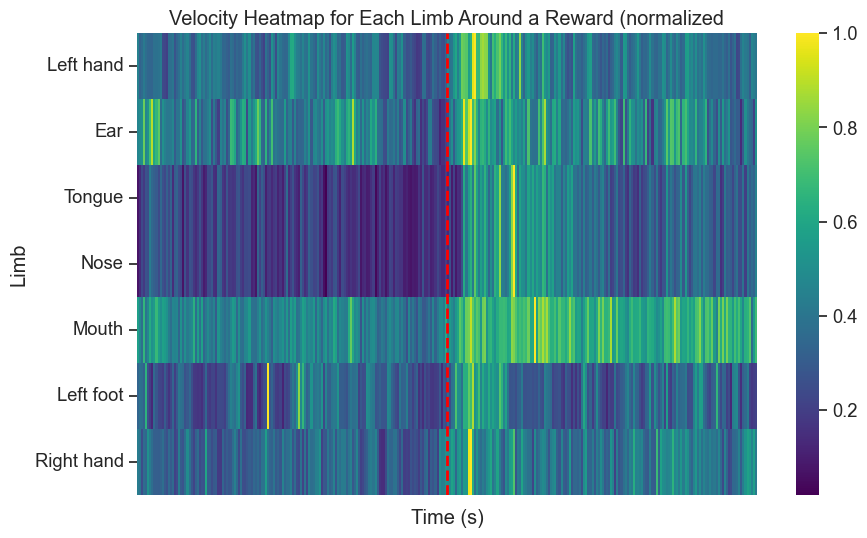

In [53]:
velocities=np.vstack([mean_array_5s_norm, mean_array_5s_ear_norm, mean_array_5s_tongue_norm,mean_array_5s_nose_norm,mean_array_5s_mouth_norm,mean_array_5s_leftfoot_norm,mean_array_5s_righthand_norm])

plt.figure(figsize=(10, 6))
sns.heatmap(velocities, cmap='viridis', xticklabels=False, yticklabels=['Left hand', 'Ear', 'Tongue','Nose', 'Mouth', 'Left foot', 'Right hand'])
plt.axvline(150, color='red', linewidth=2, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Limb')
plt.title('Velocity Heatmap for Each Limb Around a Reward (normalized')
plt.show()


In [54]:
print(mean_array_5s)

[28.66368235 21.0520899  23.22362849 27.13158081 23.97069487 22.15962739
 21.83045613 21.53467686 24.63406324 24.90824122 25.30527624 27.6401519
 15.4535495  14.58500797 13.03102017 23.51305735 24.15490261 26.16371945
 17.69677453 21.99373061 24.36654388 28.71269661 23.71032123 26.96253069
 29.43098725 23.75708309 17.33396486 16.89920783 23.28093288 30.47370023
 32.84215895 24.35217966 27.907273   23.4683669  26.30468147 30.54303745
 23.51988943 28.53245195 27.59773842 29.34415003 26.77938863 21.91937802
 22.0754509  20.57475254 19.36481259 24.49193308 23.38865194 19.77795743
 22.26397049 20.82298402 21.72134927 26.99982618 32.54214047 26.60068982
 32.28368023 21.60296626 24.94249906 17.3707802  16.73256704 21.32609569
 16.38299151 13.66768311 25.11875004 20.62157066 16.94619064 32.45574877
 27.11883322 15.86716999 30.07972842 25.71334821 23.02156406 22.21485699
 22.25807874 30.74918386 39.29017221 39.52212347 32.74536154 28.34899155
 27.27283747 25.176354   29.8319779  25.27394814 24.

Text(0.5, 1.0, 'Velocity')

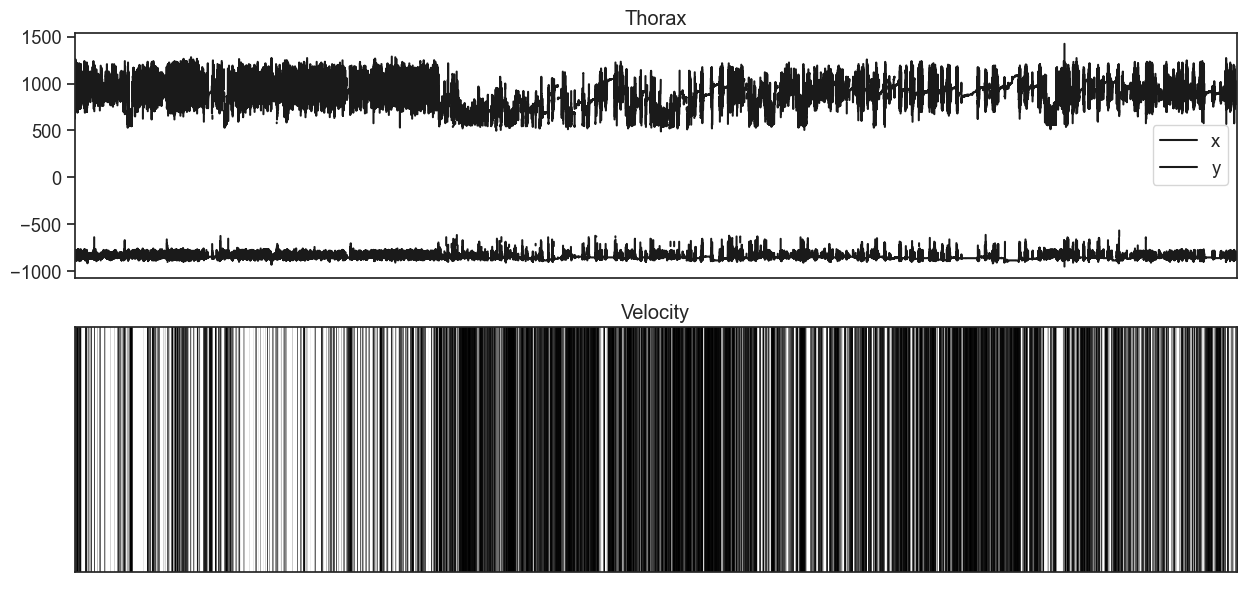

In [55]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
ax1.plot(lefthand_loc[:, 0, 0], 'k', label='x')
ax1.plot(-1*lefthand_loc[:, 1, 0], 'k', label='y')
ax1.legend()
ax1.set_xticks([])
ax1.set_title('Thorax')

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.imshow(velocity[:,np.newaxis].T, aspect='auto', vmin=0, vmax=5)
ax2.set_yticks([])
ax2.set_title('Velocity')

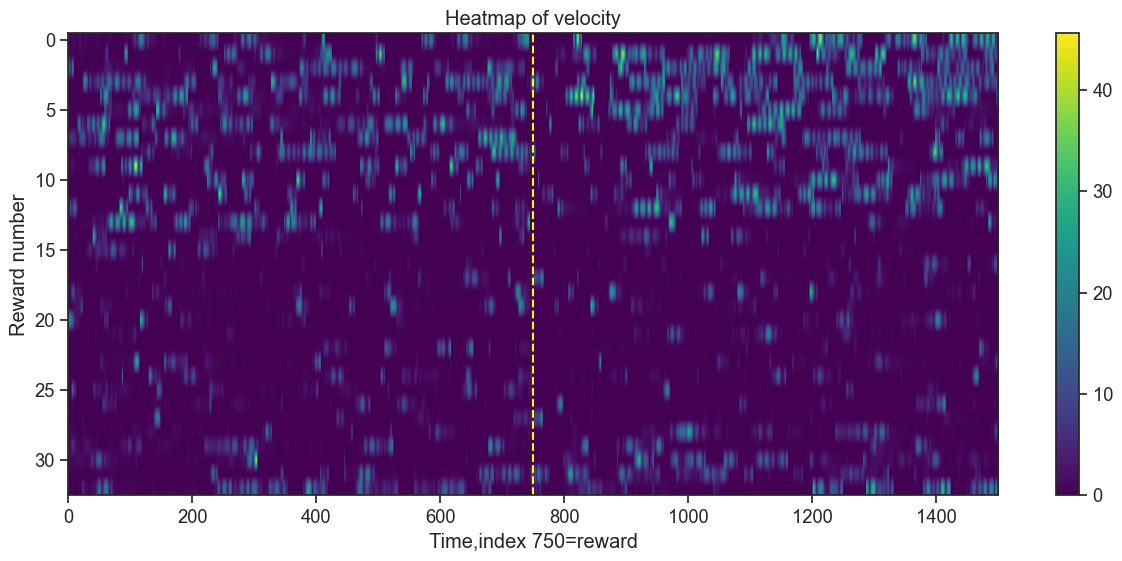

In [56]:
array_2d = np.vstack(event_arrays)
plt.imshow(array_2d, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Time,index 750=reward")
plt.ylabel("Reward number")
plt.title("Heatmap of velocity")
plt.axvline(x=750, color='yellow', linestyle='--', label='Vertical Line')
plt.show()

In [57]:
print(array_2d.size)

49500


In [58]:
print(rewards.shape)

(90000,)


In [59]:
reward_time=np.column_stack((ttl_times,rewards))
print(reward_time)
np.count_nonzero(rewards)

[[  32.8792659    0.       ]
 [  32.9132542    0.       ]
 [  32.9468929    0.       ]
 ...
 [3034.2957623    0.       ]
 [3034.3284802    0.       ]
 [3034.3622841    0.       ]]


2340

In [60]:
condition=np.isin(ttl_times, vid_times)
print(condition)



[ True False False ... False False False]


In [61]:
np.count_nonzero(condition)

1

In [62]:
print(new_column)

NameError: name 'new_column' is not defined

In [ ]:
result = np.column_stack((reward_time, new_column))
print(result)